In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (18.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128208 files and dir

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

- df_1 : 첫번째 데이터 오류발생
- df_2 : 첫번째 데이터에 userid를 추가함
- df_3 : 리뷰 date를 추가
- df_4 : 전처리를 진행
- df_6 : 전처리 합치고 최종 df

In [ ]:
#이걸 가져오면 밑에 전처리는 생략 
df = pd.read_csv('/content/drive/MyDrive/df_6_final.csv')
df.head()
df.shape

(12330, 10)

In [ ]:
df['가게'].unique()

array(['후라이드참잘하는집-서강대점', '청년치킨-서교점', '베이직프라이드치킨-신촌직영점', '지코바치킨-신촌점',
       '교촌치킨-신촌점', '순살만공격-마포신촌점', '푸라닭-신수점', '치킨플러스-성산점', '이나닭강정-신촌점',
       '맘스터치피자앤치킨-연대점', '지코바치킨-독립문점', '치킨플러스-서교점', 'BHC-신촌점',
       '골라먹는3가지맛디디치킨-연세대점', '굽네치킨&피자-서강점', '굽네치킨&피자-남가좌1호점', '치킨더홈-서울이대점',
       '굽네치킨&피자-이대역점', '맥시칸치킨-연희점', '오늘통닭-신촌점', '숯미남숯불치킨에미친남자',
       '수준이다른치킨-마포신촌점', '자담치킨-신촌점', '마깐마포깐풍기-신촌본점', '페리카나-이대점',
       '굽네치킨&피자-신촌점', '지코바치킨-홍대점', 'BHC-홍대초교점', '노랑통닭-아현점',
       '피자와치킨의러브레터-서대문점', '바른치킨-공덕파크자이점', '페리카나-합정동점', '지코바치킨-남가좌점',
       '롯데리아-홍대점', '컬투치킨-연남사랑점', '전국3대치킨오성통닭-마포신촌점', '쌀통에퐁닭', '네네치킨-서교점',
       '가마로강정-광흥창점', 'BHC-연희점', '멕시칸치킨-연남점', '골라먹는3가지맛디디치킨-아현점',
       '페리카나-홍익대점', '신미경홍대닭갈비3', '강정이기가막혀-연희점', 'BBQ-신촌점', '처갓집양념치킨-독립문점',
       '양념이맛있는순살킹-아현점', '호식이두마리치킨-명지대점', '신미불닭발-서울본점', '푸라닭-합정점',
       '티바두마리치킨-신수서강대점', 'BHC-공덕점', '호치킨-마포래미안푸르지오점', '치킨시대-명지대점'],
      dtype=object)

In [ ]:
#299개 혹은 99개씩 리뷰를 뽑아서 중복된 치킨집이 없는 것을 확인
# 198개 299 *2
df['가게'].value_counts()

굽네치킨&피자-서강점          295
호식이두마리치킨-명지대점        293
BHC-신촌점              292
BHC-공덕점              291
이나닭강정-신촌점            291
베이직프라이드치킨-신촌직영점      290
순살만공격-마포신촌점          290
푸라닭-신수점              290
굽네치킨&피자-이대역점         290
골라먹는3가지맛디디치킨-아현점     288
굽네치킨&피자-남가좌1호점       287
BHC-홍대초교점            286
후라이드참잘하는집-서강대점       285
지코바치킨-남가좌점           272
치킨플러스-서교점            272
치킨플러스-성산점            271
처갓집양념치킨-독립문점         270
지코바치킨-독립문점           269
교촌치킨-신촌점             267
청년치킨-서교점             267
오늘통닭-신촌점             266
마깐마포깐풍기-신촌본점         265
맥시칸치킨-연희점            264
치킨더홈-서울이대점           262
BHC-연희점              261
골라먹는3가지맛디디치킨-연세대점    259
신미불닭발-서울본점           258
전국3대치킨오성통닭-마포신촌점     258
수준이다른치킨-마포신촌점        257
컬투치킨-연남사랑점           255
네네치킨-서교점             253
티바두마리치킨-신수서강대점       252
가마로강정-광흥창점           251
자담치킨-신촌점             247
페리카나-홍익대점            243
피자와치킨의러브레터-서대문점      242
신미경홍대닭갈비3            239
굽네치킨&피자-신촌점          235
쌀통에퐁닭                231
지코바치킨-홍대점            227


In [ ]:
df.iloc[20,:]

가게       후라이드참잘하는집-서강대점
맛                     5
양                     5
날짜           2023-02-09
주문               반마리（뼈）
사용자id                me
리뷰           맛있어요 ~~~~~
Name: 20, dtype: object

In [ ]:
df.iloc[10,:]

가게              후라이드참잘하는집-서강대점
맛                            5
양                            5
날짜                  2023-02-13
주문             눈꽃치즈치킨（무＋소스＋콜라）
사용자id                       ad
리뷰       잘먹었습니다. 지난번보다 더 맛있어요😊
Name: 10, dtype: object

## 사용자id 전처리하기

중복된 사용자가 있는지 확인하기
- 1번만 리뷰한 사용자들은 어떻게 할까?? 
- 사용자id에 이상한게 잇는 것도 있음

In [ ]:
#id는 2글자로 정했는데, 이게 아닌 경우가 있으니 확인해보자


user_id = []

for i,x in enumerate(df['사용자id'].tolist()):
  if len(x) > 2:
    user_id.append(i)

#user_id

In [ ]:
#user_id가 잘못된 것을 확인

df.loc[user_id,:]

,가게,맛,양,날짜,주문,사용자id,리뷰
431,청년치킨-서교점,5,5,2022-12-13,바삭매콤 후라이드,손님 2022년 12월 13일\n신고\n★★★★★ 맛 ★ 5 양 ★ 5 배달 ★ 5...,맛있어요 추천합니다
437,청년치킨-서교점,5,5,2022-12-09,\t,손님 2022년 12월 9일\n신고\n★★★★★ 맛 ★ 5 양 ★ 5 배달 ★ 5\n\t,\n바삭매콤 후라이드/1(뼈 or 순살 선택(순살))
443,청년치킨-서교점,5,5,2022-12-03,청년반반 세트（후라이드반＋,손님 2022년 12월 3일\n신고\n★★★★★ 맛 ★ 5 양 ★ 5 배달 ★ 5\...,빠르다고는 했는데 이 정도로 빠를줄은 몰랐네요 ㅎㅎ 후라이드도 딱 깔끔한 맛이여서 ...
498,청년치킨-서교점,5,5,2022-11-01,바삭매콤 후라이드,손님 2022년 11월 1일\n신고\n★★★★★ 맛 ★ 5 양 ★ 5 배달 ★ 5\...,배달도 빨리 오고 맛있었습니다
518,청년치킨-서교점,5,5,2022-10-15,바삭매콤 후라이드,손님 2022년 10월 15일\n신고\n★★★★★ 맛 ★ 5 양 ★ 5 배달 ★ 5...,맛있게 잘먹었습니다
...,...,...,...,...,...,...,...
12758,티바두마리치킨-신수서강대점,5,5,2022-04-16,어쩔만두세트1（뼈）두마리치킨,손님 2022년 4월 16일\n신고\n★★★★★ 맛 ★ 5 양 ★ 5 배달 ★ 4\...,처음 시켜봤는데 생각보다 양도 많고 아주 맛나게 잘 먹었습니다. 앞으로도 시켜먹을것...
12790,티바두마리치킨-신수서강대점,5,5,2022-03-28,어쩔만두세트1（뼈）두마리치킨,손님 2022년 3월 28일\n신고\n★★★★★ 맛 ★ 5 양 ★ 5 배달 ★ 5\...,👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻
12844,티바두마리치킨-신수서강대점,5,5,2022-03-06,어쩔만두세트1（뼈）두마리치킨,손님 2022년 3월 6일\n신고\n★★★★★ 맛 ★ 5 양 ★ 5 배달 ★ 5\n...,진짜 맛있는조합이에요
12877,티바두마리치킨-신수서강대점,5,5,2022-02-17,（순살）두마리세트 （한마리＋한마리＋콜라）,손님 2022년 2월 17일\n신고\n★★★★★ 맛 ★ 5 양 ★ 5 배달 ★ 5\...,드디어 똥집튀김이 생겨서 너무 행복해요! 이번주문에는 사진을 찍어두지 않아서 저번에...


In [ ]:
df.shape

(13382, 7)

In [ ]:
#위의 데이터는 유저아이디가 없으니 삭제하자
#207개의 데이터 삭제

df = df.drop(index = user_id)
df.shape

(13175, 7)

In [ ]:
df['사용자id'].value_counts()

ch    236
le    187
sh    183
ki    173
su    163
     ... 
vv      1
pg      1
mt      1
kf      1
0e      1
Name: 사용자id, Length: 815, dtype: int64

In [ ]:
df['사용자id'].nunique()

815

In [ ]:
#다시 실행했을때 없는 것을 확인

user_id = []

for i,x in enumerate(df['사용자id'].tolist()):
  if len(x) > 2:
    user_id.append(i)
user_id

[]

In [ ]:
#제일 주문이 많은 사용자id : ch***** ch123 ch11
#이 프로젝트의 보완할 점 :  사용자id를 앞에 2글자로 제한했는데 앞에 2글자가 같은 유저의 경우 같은 아이디로 취급될 수 있음


df[df['사용자id'] == 'ch']

,가게,맛,양,날짜,주문,사용자id,리뷰
14,후라이드참잘하는집-서강대점,5,5,2023-02-12,반마리（순살）,ch,저는 후기를 자주 하지 않는 편인데 그래서도 해야지 이렇게 생각하는 만큼 맛있고 무...
62,후라이드참잘하는집-서강대점,3,4,2023-01-14,반반치킨（후라이드반＋,ch,후라이드반마리가 네조각인데 조각크기가 넘 커요 맛은 무난해요
67,후라이드참잘하는집-서강대점,2,5,2023-01-13,순살반반치킨（후라이드반＋,ch,치킨은 이상한맛났는데…
84,후라이드참잘하는집-서강대점,4,5,2022-12-31,순살 후라이드,ch,양이 많고 맛있었어용 !!!
88,후라이드참잘하는집-서강대점,4,5,2022-12-30,반마리（순살）,ch,맛과 양이 좋습니다
...,...,...,...,...,...,...,...
13128,BHC-공덕점,5,4,2022-11-15,치퐁당 스틱,ch,감사합니다. 맛있게 잘 먹었습니다~.
13134,BHC-공덕점,5,4,2022-11-07,뿌링클 콤보,ch,집근처보다 여기가 훨씬 맛나고 좋습니다
13268,호치킨-마포래미안푸르지오점,5,5,2022-12-03,[시그니처]치슐랭,ch,호치킨 흥해라 !!
13274,호치킨-마포래미안푸르지오점,5,5,2022-12-02,간장치킨,ch,호치킨 간장 치킨만 5번 넘게 시켜 먹었네요!


In [ ]:
#사용자 id는 결측값이 없음

df[df['사용자id'].isna()]

,가게,맛,양,날짜,주문,사용자id,리뷰


## 가게 전처리하기
- 이부분은 이미 해서 df_4_전처리가 됨

In [ ]:
df['가게'].unique()

array(['후라이드참잘하는집-서강대점', '청년치킨-서교점', '베이직프라이드치킨-신촌직영점', '지코바치킨-신촌점',
       '교촌치킨-신촌점', '순살만공격-마포신촌점', '푸라닭-신수점', '치킨플러스-성산점', '이나닭강정-신촌점',
       '맘스터치피자앤치킨-연대점', '지코바치킨-독립문점', '치킨플러스-서교점', 'BHC-신촌점',
       '골라먹는3가지맛디디치킨-연세대점', '굽네치킨&피자-서강점', '굽네치킨&피자-남가좌1호점', '치킨더홈-서울이대점',
       '굽네치킨&피자-이대역점', '맥시칸치킨-연희점', '오늘통닭-신촌점', '숯미남숯불치킨에미친남자',
       '수준이다른치킨-마포신촌점', '자담치킨-신촌점', '마깐마포깐풍기-신촌본점', '페리카나-이대점',
       '굽네치킨&피자-신촌점', '지코바치킨-홍대점', 'BHC-홍대초교점', '노랑통닭-아현점',
       '피자와치킨의러브레터-서대문점', '바른치킨-공덕파크자이점', '페리카나-합정동점', '지코바치킨-남가좌점',
       '롯데리아-홍대점', '컬투치킨-연남사랑점', '전국3대치킨오성통닭-마포신촌점', '쌀통에퐁닭', '네네치킨-서교점',
       '가마로강정-광흥창점', 'BHC-연희점', '롯데리아-신촌로터리점', '멕시칸치킨-연남점',
       '골라먹는3가지맛디디치킨-아현점', '페리카나-홍익대점', '파스타입니다-마포점', '신미경홍대닭갈비3',
       '강정이기가막혀-연희점', 'BBQ-신촌점', '처갓집양념치킨-독립문점', '양념이맛있는순살킹-아현점',
       '호식이두마리치킨-명지대점', '정가네추억떡볶이', '신미불닭발-서울본점', '푸라닭-합정점',
       '티바두마리치킨-신수서강대점', 'BHC-공덕점', '델리인디아', '호치킨-마포래미안푸르지오점',
       '치킨시대-명지대점'], dtype=object)

In [ ]:
#치킨집 아닌거 빼기
#킹케밥 킹케밥-홍대점 파스타어때-마포신촌본점 파스타입니다-마포점
#계산해보니 600개정도의 치킨집이 아닌 곳이 있어서 얘네는 제외시키자

temp = df.query('(가게 == "정가네추억떡볶이") or (가게 == "델리인디아") or (가게 == "롯데리아-신촌로터리점") or (가게 == "파스타입니다-마포점") ')
temp['가게'].value_counts()

롯데리아-신촌로터리점    299
파스타입니다-마포점     299
정가네추억떡볶이       299
델리인디아           99
Name: 가게, dtype: int64

In [ ]:
#인덱스를 확인 한 후에 제거
#새로운 df_1을 만듬

non_chicken = temp.index
df_1 = df.drop(index = non_chicken)

In [ ]:
#제대로 제거 되었나 확인

df_1.query('(가게 == "정가네추억떡볶이") or (가게 == "델리인디아") or (가게 == "롯데리아-신촌로터리점") or (가게 == "파스타입니다-마포점") ')

,가게,맛,양,날짜,주문,사용자id,리뷰


In [ ]:
df_1['가게'].nunique()

55

In [ ]:
df_1.shape

(15041, 7)

데이터 수집 과정에서 커서를 아래로 내리다 중복해서 수집하는 경우가 있음;;
- 조사자 미숙;;
- 원래는 한 식당당 299개 혹은 99개의 리뷰가 들어가야함


In [ ]:
#오늘 통닭이 3번, BHC-공덕점가 2번, 푸라닭-합정점이 2번 들어감
#오늘 통닭의 리뷰를 2개 제거, BHC-공덕점가 1번, 푸라닭-합정점이 1번 제거 필요
df_1['가게'].value_counts()

오늘통닭-신촌점             897
BHC-공덕점              598
후라이드참잘하는집-서강대점       299
쌀통에퐁닭                299
지코바치킨-홍대점            299
청년치킨-서교점             299
노랑통닭-아현점             299
피자와치킨의러브레터-서대문점      299
페리카나-합정동점            299
지코바치킨-남가좌점           299
컬투치킨-연남사랑점           299
전국3대치킨오성통닭-마포신촌점     299
네네치킨-서교점             299
페리카나-이대점             299
가마로강정-광흥창점           299
BHC-연희점              299
골라먹는3가지맛디디치킨-아현점     299
페리카나-홍익대점            299
신미경홍대닭갈비3            299
처갓집양념치킨-독립문점         299
호식이두마리치킨-명지대점        299
신미불닭발-서울본점           299
티바두마리치킨-신수서강대점       299
굽네치킨&피자-신촌점          299
BHC-홍대초교점            299
마깐마포깐풍기-신촌본점         299
굽네치킨&피자-서강점          299
순살만공격-마포신촌점          299
교촌치킨-신촌점             299
치킨플러스-성산점            299
이나닭강정-신촌점            299
자담치킨-신촌점             299
지코바치킨-독립문점           299
치킨플러스-서교점            299
BHC-신촌점              299
골라먹는3가지맛디디치킨-연세대점    299
굽네치킨&피자-남가좌1호점       299
치킨더홈-서울이대점           299
굽네치킨&피자-이대역점         299
베이직프라이드치킨-신촌직영점      299


In [ ]:
#중복 식당의 인덱스를 이용해서 제거하기

id_1 = list(df_1[df_1['가게']== '오늘통닭-신촌점'].index)
id_2 = list(df_1[df_1['가게']== 'BHC-공덕점'].index)
id_3 = list(df_1[df_1['가게']== '푸라닭-합정점'].index)

for i in range(99):
  del id_3[i]

for i in range(299):
  del id_2[i]

for i in range(299):
  del id_1[i]

In [ ]:
# 중복 식당 제거

# df_2 = df_1.drop(index = id_1 )
# df_2 = df_2.drop(index = id_2 )
# df_2 = df_2.drop(index = id_3 )

In [ ]:
# 확인해보니 중복된 식당이 없는 것을 확인
#df_2['가게']

In [ ]:
#생각보다 음식 주문이 종류가 많지 않음

df_2['주문'].nunique()

5875

In [ ]:
#생각보다 음식 주문이 종류가 많지 않음

df_2['사용자id'].nunique()

1042

In [ ]:
#가게도 결측치 없음

df[df['가게'].isna()]

,가게,맛,양,날짜,주문,사용자id,리뷰


주문 전처리하기

In [ ]:
#주문 전처리하기
#뒤에 쓸데없는 것은 제거

temp_1 = df_2['주문']

In [ ]:
#for i in temp_1.

0                             ★ 5 배달 ★ 5\n핫간장치킨（무＋소스＋콜라）/1
1                                    ★ 5 배달 ★ 5\n순살 후라이드/1
2             ★ 5 배달 ★ 5\n반마리（순살）/1(반마리 메뉴 선택(후라이드),추가 선택(
3                   ★ 5 배달 ★ 5\n반마리（순살）/1(반마리 메뉴 선택(후라이드))
4                          ★ 5 배달 ★ 5\n핫토스치킨（뼈）（무＋소스＋콜라）/1
                               ...                        
16032      ★ 5 배달 ★ 5\n크리스피치킨/1(음료 선택(콜라 1.25L로 변경),추가 선택(
16033     ★ 5 배달 ★ 5\n원하는대로 삼총사（반／반／반）/1(치킨선택1(크리스피（선택1...
16034                 ★ 5 배달 ★ 5\n크리스피치킨/1(음료 선택(콜라500mL))
16035                                       ★ 5 배달 ★ 5\n\t
16036                      ★ 5 배달 ★ 5\n내맘대로 두마리세트/1(치킨선택1(
Name: 주문, Length: 14045, dtype: object

In [ ]:
li = []
k = []
for idx,x in enumerate(temp_1):
  try:
      a = x.split('\n')[1]
      li.append(idx)
  except:
      k.append(idx)

In [ ]:
temp_1.loc[1223]

' ★ 5'

In [ ]:
df_2.loc[k,:]

,가게,맛,양,날짜,주문,사용자id,리뷰
1222,교촌치킨-신촌점,5,5,2022년 6월 11일,★ 5 배달 ★ 5,al,맛있어오용 또 시킬게영
1223,교촌치킨-신촌점,5,5,2022년 6월 7일,★ 5,ek,맛나게 잘 먹었습니당~~~!!
1225,교촌치킨-신촌점,5,5,2022년 6월 7일,★ 5 배달 ★ 5,cs,치킨 담아 주시는거 보고 정말 정성을 느꼈습니다. 떠 새벽 1시에 요기요 앱 점검 ...
1233,교촌치킨-신촌점,5,5,2022년 5월 24일,★ 5 배달 ★ 5,wh,.
1236,교촌치킨-신촌점,5,5,2022년 5월 20일,★ 5 배달 ★ 5,jy,가격이 올라서 슬프지만 맛있어ㅠㅠㅠ 배달 빠른편이어서 만족스러웠어요
...,...,...,...,...,...,...,...
13411,처갓집양념치킨-독립문점,1,1,2023년 1월 17일,★ 1 배달 ★ 2\n반반치킨/1(반반선택(허니올리고당야채,na,최악의 치킨 날씨 추워서 식은건 감안해요 닭고기인지 고무줄인지 구분도 안가고 배달하...
13415,처갓집양념치킨-독립문점,5,5,2023년 1월 16일,★ 5 배달 ★ 5\n순살 슈프림,cw,맛있게 먹었습니다.
13517,처갓집양념치킨-독립문점,5,5,2022년 11월 29일,★ 5 배달 ★ 5\n허니올리고당야채,de,치킨이 느무 맛있어서 마셨어요. 원래 치킨 한마리 다 못먹는데 여기껀 다먹어요. 양...
13988,호식이두마리치킨-명지대점,4,4,2022년 8월 16일,"★ 4 배달 ★ 5\n레몬크림탕슈（안심）＋한마리 세트/1(치킨분류 선택(순살),소...",ho,맛있게 잘먹었네여~~


In [ ]:
k.remove(5526)

In [ ]:
k.remove(11630)
k.remove(11636)
k.remove(11638)
k.remove(11640)
k.remove(11654)
k.remove(11656)


In [ ]:
df_2 = df_2.drop(index = k)

In [ ]:
list(map(lambda x : x.split('\n')[1],df_2['주문']))

IndexError: ignored

In [ ]:
df_2.shape

(13693, 7)

In [ ]:
#기존에 리뷰중에 음식을 뭐 시켰는지 안 올린 리뷰가 있어서 
#예외처리로 음식정보가 없는 것의 인덱스를 찾기
#정보가 있는것은 음식이름을, 정보가 없는 리뷰는 '0'을 넣도록 해서 이후 '0'인 인덱스를 찾아서 해당 데이터 프레임에서 삭제하기 


ci = []
ans = []

for i in df_2.index.tolist():
  try:
    tt = df_2.loc[i]['주문']
    tts = tt.split('\n')[1]
    ans.append(tts)
  except:
    ci.append(i)
    ans.append('0')

In [ ]:
df_2['주문'] = ans

In [ ]:
id_food = df_2.query('주문 == "0"').index
df_2 = df_2.drop(index = id_food)

In [ ]:
df_2.head()

,가게,맛,양,날짜,주문,사용자id,리뷰
0,후라이드참잘하는집-서강대점,5,5,2일 전,핫간장치킨（무＋소스＋콜라）/1,st,주문해놓고 샤워하고 나왔는데 바로 왔음 배달은 항상 빨라서 좋고 맛은 말할거 없이 ...
1,후라이드참잘하는집-서강대점,5,5,3일 전,순살 후라이드/1,yh,맛있어요 너무 맛ㅇㅅ어옿
2,후라이드참잘하는집-서강대점,5,5,4일 전,"반마리（순살）/1(반마리 메뉴 선택(후라이드),추가 선택(",id,너무 맛있게 잘 먹렀어요. 머스터드 소스 넉넉히 주셔수 모자라지 않게 잘 먹었습니다.
3,후라이드참잘하는집-서강대점,5,5,5일 전,반마리（순살）/1(반마리 메뉴 선택(후라이드)),rl,굳굳굳 잘 먹었습니당
4,후라이드참잘하는집-서강대점,5,5,5일 전,핫토스치킨（뼈）（무＋소스＋콜라）/1,st,시즈닝 팍팍~넘 맛있었요 간만에 치킨 먹은건데 기분좋게 먹었어요


In [ ]:
# 주문 전처리 
# 뒤에 ()에는 기타 옵션이 들어가 있으니 중요한 건 아니니 제거하자
# 결과 기존 uni 364에서 221로 범위를 좁힘


a=list(map(lambda x : x.split('/')[0],df_2['주문']))
df_2['주문'] = a

In [ ]:
df_2['주문'].nunique()

1242

In [ ]:
df_2['사용자id'].nunique()

1022

날짜 전처리 하기
- 1일전 , 2일전 이런거 바꾸자 현재 날짜로 
- 그리고 계산을 편하게 하기 위해서 int형으로 바꿔보자 20230302이렇게 하면 최근날짜순을 알 수 있다.

In [ ]:
df['날짜']

0                 2일 전
1                 3일 전
2                 4일 전
3                 5일 전
4                 5일 전
             ...      
16032    2021년 12월 22일
16033    2021년 12월 18일
16034    2021년 12월 16일
16035    2021년 12월 16일
16036    2021년 12월 12일
Name: 날짜, Length: 16037, dtype: object

In [ ]:
import re
kt=df_2.loc[16036]['날짜']
kt = kt.replace('년','')

kt = kt.replace('월','')

kt = kt.replace('일','')
kt = kt.replace(' ','')

int(kt)

20211212

In [ ]:
df_2.shape

(13382, 7)

In [ ]:
# 4시간 전은   20230221
# 1일 전은     20230220
# 2일 전은     20230219
# 3일 전       20230218
# 4일 전       20230217
# 5일 전       20230216
# 6일 전       20230215
# 일주일 전    20230214
from datetime import datetime, timedelta

temp_date =[]
for i in df_2.index.tolist():
  aa = df_2.loc[i]['날짜']
  if aa == '4시간 전' or aa == '3시간 전' or aa == '7시간 전' or aa == '9시간 전' or aa == '18시간 전' or aa == '22시간 전' or aa == '23시간 전' or aa == '2시간 전' or aa == '8시간 전' or aa == '21시간 전' or aa == '20시간 전' or aa == '6시간 전' or aa == '14시간 전':
    temp_date.append(datetime(2023,2,21))
  elif aa == '1일 전' or aa =='어제' :
    temp_date.append(datetime(2023,2,20))
  elif aa == '2일 전' :
    temp_date.append(datetime(2023,2,19))
  elif aa == '3일 전' :
    temp_date.append(datetime(2023,2,18))
  elif aa == '4일 전' :
    temp_date.append(datetime(2023,2,17))
  elif aa == '5일 전' :
    temp_date.append(datetime(2023,2,16))
  elif aa == '6일 전' :
    temp_date.append(datetime(2023,2,15))
  elif aa == '일주일 전' :
    temp_date.append(datetime(2023,2,14))
  else:
    # aa = aa.replace('년','')

    # aa = aa.replace('월','')

    # aa = aa.replace('일','')
    # aa = aa.replace(' ','')

    temp_date.append(datetime.strptime(aa, "%Y년 %m월 %d일"))
    


In [ ]:
datetime(2023,2,20)

datetime.datetime(2023, 2, 20, 0, 0)

In [ ]:
dt = df_2.loc[1555]['날짜']
datetime.strptime(dt, "%Y년 %m월 %d일")
#datetime.strptime(dt, "%년 %월 %일")

datetime.datetime(2022, 7, 31, 0, 0)

In [ ]:
df_3 = df_2.copy()

In [ ]:
df_3['날짜'] = temp_date

In [ ]:
df_2.head()

,가게,맛,양,날짜,주문,사용자id,리뷰
0,후라이드참잘하는집-서강대점,5,5,2일 전,핫간장치킨（무＋소스＋콜라）,st,주문해놓고 샤워하고 나왔는데 바로 왔음 배달은 항상 빨라서 좋고 맛은 말할거 없이 ...
1,후라이드참잘하는집-서강대점,5,5,3일 전,순살 후라이드,yh,맛있어요 너무 맛ㅇㅅ어옿
2,후라이드참잘하는집-서강대점,5,5,4일 전,반마리（순살）,id,너무 맛있게 잘 먹렀어요. 머스터드 소스 넉넉히 주셔수 모자라지 않게 잘 먹었습니다.
3,후라이드참잘하는집-서강대점,5,5,5일 전,반마리（순살）,rl,굳굳굳 잘 먹었습니당
4,후라이드참잘하는집-서강대점,5,5,5일 전,핫토스치킨（뼈）（무＋소스＋콜라）,st,시즈닝 팍팍~넘 맛있었요 간만에 치킨 먹은건데 기분좋게 먹었어요


In [ ]:
df_3.head()

,가게,맛,양,날짜,주문,사용자id,리뷰
0,후라이드참잘하는집-서강대점,5,5,2023-02-19,핫간장치킨（무＋소스＋콜라）,st,주문해놓고 샤워하고 나왔는데 바로 왔음 배달은 항상 빨라서 좋고 맛은 말할거 없이 ...
1,후라이드참잘하는집-서강대점,5,5,2023-02-18,순살 후라이드,yh,맛있어요 너무 맛ㅇㅅ어옿
2,후라이드참잘하는집-서강대점,5,5,2023-02-17,반마리（순살）,id,너무 맛있게 잘 먹렀어요. 머스터드 소스 넉넉히 주셔수 모자라지 않게 잘 먹었습니다.
3,후라이드참잘하는집-서강대점,5,5,2023-02-16,반마리（순살）,rl,굳굳굳 잘 먹었습니당
4,후라이드참잘하는집-서강대점,5,5,2023-02-16,핫토스치킨（뼈）（무＋소스＋콜라）,st,시즈닝 팍팍~넘 맛있었요 간만에 치킨 먹은건데 기분좋게 먹었어요


In [ ]:
#인덱스 초기화
df_3.reset_index(drop = True,inplace = True)

In [ ]:
df_3.head()

,가게,맛,양,날짜,주문,사용자id,리뷰
0,후라이드참잘하는집-서강대점,5,5,2023-02-19,핫간장치킨（무＋소스＋콜라）,st,주문해놓고 샤워하고 나왔는데 바로 왔음 배달은 항상 빨라서 좋고 맛은 말할거 없이 ...
1,후라이드참잘하는집-서강대점,5,5,2023-02-18,순살 후라이드,yh,맛있어요 너무 맛ㅇㅅ어옿
2,후라이드참잘하는집-서강대점,5,5,2023-02-17,반마리（순살）,id,너무 맛있게 잘 먹렀어요. 머스터드 소스 넉넉히 주셔수 모자라지 않게 잘 먹었습니다.
3,후라이드참잘하는집-서강대점,5,5,2023-02-16,반마리（순살）,rl,굳굳굳 잘 먹었습니당
4,후라이드참잘하는집-서강대점,5,5,2023-02-16,핫토스치킨（뼈）（무＋소스＋콜라）,st,시즈닝 팍팍~넘 맛있었요 간만에 치킨 먹은건데 기분좋게 먹었어요


In [ ]:
df_3.to_csv('df_4_plus_전처리.csv',index = False,encoding="utf-8-sig")

In [ ]:
df_3.loc[263]

가게            후라이드참잘하는집-서강대점
맛                          5
양                          5
날짜       2022-08-15 00:00:00
주문             후라이드（무＋소스＋콜라）
사용자id                     ui
리뷰               후라이드는 후참잘!!
Name: 263, dtype: object

In [ ]:
#날짜도 결측치 없음

df[df['날짜'].isna()]

,가게,맛,양,날짜,주문,사용자id,리뷰


## 맛과 양의 전처리
- 확인 결과 value_count를 해도 그냥 숫자만 나옴 이상없음

In [ ]:
df['맛'].value_counts()

5    12306
4      556
3      160
1       98
2       55
Name: 맛, dtype: int64

In [ ]:
df['양'].value_counts()

5    12337
4      575
3      159
1       62
2       42
Name: 양, dtype: int64

In [ ]:
df[df['맛'].isna()]

,가게,맛,양,날짜,주문,사용자id,리뷰


In [ ]:
df[df['양'].isna()]

,가게,맛,양,날짜,주문,사용자id,리뷰


리뷰 전처리하기
- 이모티콘등은 삭제하기
- 은어나 인터넷 용어는 어떻게 해야 할지

In [ ]:
# 인덱스 초기화

df_1 =df.reset_index(drop = True)

In [ ]:
review_list = []

for i,x in enumerate(df_1['리뷰'].tolist()):
  
  try:
    if len(x) <= 4:
      review_list.append(i)
  except:
    review_list.append(i)
review_list 

[91,
 332,
 501,
 656,
 755,
 812,
 913,
 1109,
 1581,
 2192,
 2561,
 2855,
 2885,
 2945,
 3195,
 3216,
 3314,
 3455,
 3890,
 4022,
 4520,
 5001,
 5046,
 5086,
 5489,
 6044,
 6370,
 6491,
 6497,
 6595,
 6705,
 6713,
 7124,
 7140,
 7547,
 7619,
 7866,
 8009,
 8066,
 8309,
 8454,
 8493,
 9347,
 9653,
 9845,
 10737,
 10911,
 10956,
 11012,
 11373,
 11377,
 12251,
 12484]

In [ ]:
#얘네는 어떻게 하지??
#리뷰가 .이나 nan은 삭제하면 될 것같고, 한글자 리뷰나 이모티콘리뷰는 아래에서 라이브러리를 쓰면 삭제될듯????
#53개이니 그냥 삭제하자

df_1.loc[review_list,:]

,가게,맛,양,날짜,주문,사용자id,리뷰
91,후라이드참잘하는집-서강대점,5,5,2022-12-28,후라이드（무＋소스＋콜라）,ru,감동
332,청년치킨-서교점,5,5,2023-02-07,NaN,yg,.
501,청년치킨-서교점,5,5,2022-10-23,바삭매콤 후라이드,94,good
656,베이직프라이드치킨-신촌직영점,5,5,2023-01-25,간장마고치킨 [이것은 요리입니다],zx,굿
755,베이직프라이드치킨-신촌직영점,5,5,2022-12-08,파닭파닭,ru,역시!
812,베이직프라이드치킨-신촌직영점,5,5,2022-11-25,더바삭치킨 [바삭담백사장추천],ru,🤗!
913,지코바치킨-신촌점,5,5,2023-02-16,순살,sa,존맛.
1109,교촌치킨-신촌점,5,5,2022-09-24,교촌레드윙,ku,.
1581,푸라닭-신수점,5,5,2023-01-15,콘소메이징,dl,굿
2192,이나닭강정-신촌점,5,5,2023-01-25,간장맛1박스,zx,굿


In [ ]:
#위의 리뷰데이터는 삭제
df_1.drop(index = review_list,inplace = True)

In [ ]:
#인덱스 정렬
df_1 =df_1.reset_index(drop = True)

In [ ]:
#제대로 삭제됨

review_list = []

for i,x in enumerate(df_1['리뷰'].tolist()):
  
  try:
    if len(x) <= 4:
      review_list.append(i)
  except:
    review_list.append(i)

review_list

[]

위에서 보니 주문도 이상한게 있음
- 상식적으로 주문내역이 "치킨"이렇게 2글자일리는 없음 아까 3글자 반마리는 봄
- 따라서 3글자 이하는 다 찾아보자

In [ ]:
food_list = []

for i,x in enumerate(df_1['주문'].tolist()):
  
  try:
    if len(x) <= 4:
      food_list.append(i)
  except:
    food_list.append(i)

food_list

[13,
 40,
 59,
 64,
 101,
 103,
 122,
 172,
 200,
 207,
 222,
 233,
 235,
 260,
 264,
 272,
 278,
 305,
 307,
 314,
 350,
 355,
 368,
 370,
 372,
 379,
 385,
 402,
 412,
 417,
 423,
 425,
 437,
 476,
 481,
 502,
 523,
 524,
 560,
 568,
 582,
 615,
 624,
 633,
 673,
 686,
 693,
 722,
 723,
 739,
 751,
 762,
 786,
 798,
 803,
 832,
 845,
 866,
 885,
 886,
 887,
 888,
 889,
 890,
 891,
 892,
 893,
 894,
 895,
 896,
 898,
 899,
 900,
 901,
 902,
 904,
 905,
 906,
 907,
 908,
 909,
 910,
 911,
 912,
 914,
 915,
 916,
 917,
 918,
 919,
 921,
 922,
 923,
 924,
 925,
 927,
 928,
 930,
 931,
 932,
 933,
 934,
 935,
 936,
 937,
 938,
 939,
 940,
 942,
 943,
 944,
 945,
 946,
 947,
 948,
 949,
 951,
 952,
 953,
 955,
 956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965,
 966,
 967,
 968,
 969,
 970,
 971,
 972,
 973,
 974,
 975,
 976,
 977,
 978,
 979,
 980,
 985,
 986,
 987,
 988,
 991,
 992,
 999,
 1003,
 1006,
 1007,
 1009,
 1010,
 1012,
 1013,
 1014,
 1016,
 1017,
 1021,
 1022,
 1023,
 

In [ ]:
#확인 해보니 그냥 순살이라는 메뉴가 있음

df_1.loc[food_list,:]



,가게,맛,양,날짜,주문,사용자id,리뷰
13,후라이드참잘하는집-서강대점,5,5,2023-02-12,순살,tj,소스 넉넉한거 보세요.. 진짜 존맛ㅠㅠ 어제 밤부터 먹고싶어서 벼르다가 일어나자마자...
40,후라이드참잘하는집-서강대점,5,5,2023-01-25,\t,kk,\n반반치킨（후라이드반＋양념반）/1
59,후라이드참잘하는집-서강대점,5,5,2023-01-15,NaN,eh,"서강대점 평점이 4.8? 이건 못참지~ 5점으로 혼내드립니다~ 최고의 바삭함, 안에..."
64,후라이드참잘하는집-서강대점,5,5,2023-01-13,순살,ge,가성비 갓의 순살 양념치킨! 2번째 먹는중
101,후라이드참잘하는집-서강대점,5,5,2022-12-16,\t,le,"\n순살 후라이드/1,반반치킨（양념반＋간장반）/1(콜라1.25L로변경(콜라1.25L..."
...,...,...,...,...,...,...,...
13109,치킨시대-명지대점,5,5,2022-01-05,\t,iy,"\n원하는대로 삼총사（반／반／반）/1(치킨선택1(간장치킨（선택1）),안심순살변경추가..."
13111,치킨시대-명지대점,5,5,2022-01-03,NaN,ki,빠른 배달 좋네요 치킨도 맛있구요 치킨무 2개 인데 1개만 왔어요 ㅋㅋ 다음에도 주...
13113,치킨시대-명지대점,5,5,2022-01-02,NaN,ng,너무너무 맛나요 진짜 치킨이 실~ 하고 양념도 너무 맛있어요 후라이드 육즙이 살아 ...
13116,치킨시대-명지대점,5,5,2021-12-23,NaN,hy,처음시켜보았는데 맛있네요 치즈볼도 정말 맛있었어요 하트야채도 감동이에요


In [ ]:
'''
1. 순살은 아래에서 보았듯이 지코바의 메뉴로 800개의 리뷰가 있으니 냅두자
2. \t는 삭제
3. 닭강정이나 반반치킨등 리뷰건수가 50개가 넘는 것은 남기고 나머지는 카디널리티만 높이니 삭제???


'''


df_1.loc[food_list,:]['주문'].value_counts()

순살      844
\t      317
닭강정     191
반반치킨    185
오리지널    175
       ... 
폭립        1
대새골드      1
반반파닭      1
페리윙       1
신선윙       1
Name: 주문, Length: 121, dtype: int64

In [ ]:
#삭제 해야 할것
# '\t' '뼈 '  '청' 'SET）' '4.순살'


df_1.loc[food_list,:]['주문'].value_counts().to_dict()

{'순살': 844,
 '\t': 317,
 '닭강정': 191,
 '반반치킨': 185,
 '오리지널': 175,
 '뿌링클': 144,
 '후라이드': 118,
 '참숯 ': 76,
 '맛초킹': 76,
 '뼈 ': 76,
 '반반（': 68,
 '볼케이노': 68,
 '골드킹': 63,
 '순살 ': 61,
 '갈비천왕': 39,
 '불금치킨': 36,
 '뼈 반반': 31,
 '슈프림': 29,
 '무뼈닭발': 28,
 '꼬들목': 27,
 '순살반반': 26,
 '치킨텐더': 26,
 '컬투치킨': 22,
 '허니콤보': 22,
 '로스핀': 20,
 '혼치킨': 16,
 '간장치킨': 16,
 '블랙마요': 16,
 '순살치킨': 15,
 '신미경': 15,
 '커리퀸': 14,
 '바삭클': 13,
 '불패치킨': 11,
 '파닭파닭': 11,
 '트리플팩': 11,
 '맘스': 10,
 '매운': 10,
 '윙봉': 10,
 '싸이순살': 8,
 '반반콤보': 8,
 '다리（': 8,
 '대새레드': 7,
 '막창': 7,
 '찐4피자': 7,
 '깐풍치킨': 7,
 '순살청': 7,
 '옛날치킨': 7,
 '핫쵸킹': 7,
 '교촌윙': 7,
 '청': 6,
 '대새블랙': 6,
 '새우버거': 6,
 '교촌콤보': 5,
 '쉑쉑': 5,
 '파닭치킨': 5,
 '맵소킹': 5,
 '통닭뱅이': 5,
 '마늘치킨': 4,
 '파닭': 4,
 '레고치킨': 4,
 '닭다리': 4,
 '불닭발': 4,
 '맵삭치킨': 4,
 '레드킹': 4,
 '크리미': 4,
 '다리': 4,
 'SET）': 4,
 '레드윙': 3,
 '순살매운': 3,
 '블랙악마': 3,
 '매운불': 3,
 '갈릭마왕': 3,
 '레드콤보': 3,
 '매달구': 3,
 '꿀잼치킨': 3,
 '순살파닭': 2,
 '킹': 2,
 '똥집볶음': 2,
 '빠텐더': 2,
 '파티팩': 2,
 'XO': 2,
 '마늘강정': 2,
 '불닭치킨': 2,
 '허니멜로': 2,
 '다

In [ ]:
#'\t' '뼈 '  '청' 'SET）' '4.순살'
#약 400개 이것도 삭제하자

df_1.query('(주문 == "\t") or (주문 == "뼈 ") or (주문 == "청") or (주문 == "4.순살")')

,가게,맛,양,날짜,주문,사용자id,리뷰
40,후라이드참잘하는집-서강대점,5,5,2023-01-25,\t,kk,\n반반치킨（후라이드반＋양념반）/1
101,후라이드참잘하는집-서강대점,5,5,2022-12-16,\t,le,"\n순살 후라이드/1,반반치킨（양념반＋간장반）/1(콜라1.25L로변경(콜라1.25L..."
103,후라이드참잘하는집-서강대점,5,5,2022-12-10,\t,ki,\n순살반반치킨（후라이드반＋양념반）/1(추가 선택(감자튀김))
122,후라이드참잘하는집-서강대점,5,5,2022-11-23,\t,eu,\n순살반반치킨 （후라이드반＋킹트리플반）/1(추가 선택(감자튀김))
235,후라이드참잘하는집-서강대점,5,5,2022-08-31,\t,ms,\n반반치킨（후라이드반＋양념반）/1
...,...,...,...,...,...,...,...
13090,치킨시대-명지대점,5,5,2022-02-14,\t,km,\n양념으로 반반/1(음료 선택(사이다500mL))
13093,치킨시대-명지대점,5,5,2022-02-09,\t,ng,"\n원하는대로 삼총사（반／반／반）/1(치킨선택1(크리스피（선택1）),치킨선택2(양념..."
13100,치킨시대-명지대점,5,5,2022-01-21,\t,tm,"\n원하는대로 삼총사（반／반／반）/1(치킨선택1(크리스피（선택1）),안심순살변경추가..."
13109,치킨시대-명지대점,5,5,2022-01-05,\t,iy,"\n원하는대로 삼총사（반／반／반）/1(치킨선택1(간장치킨（선택1）),안심순살변경추가..."


In [ ]:
food_error_idx = df_1.query('(주문 == "\t") or (주문 == "뼈 ") or (주문 == "청") or (주문 == "4.순살")').index

df_1 = df_1.drop(index = food_error_idx)

In [ ]:
#주문이 누락된 것도 삭제

df_1[df_1['주문'].isna()]

,가게,맛,양,날짜,주문,사용자id,리뷰
59,후라이드참잘하는집-서강대점,5,5,2023-01-15,NaN,eh,"서강대점 평점이 4.8? 이건 못참지~ 5점으로 혼내드립니다~ 최고의 바삭함, 안에..."
172,후라이드참잘하는집-서강대점,5,5,2022-09-29,NaN,hy,맛있게먹었습미당항상
207,후라이드참잘하는집-서강대점,5,5,2022-09-14,NaN,kj,맛있게 잘 먹었습니다
222,후라이드참잘하는집-서강대점,5,5,2022-09-05,NaN,st,후라이드도 맛있지만 양념도 맛있어요 양념은 후참에서만 주문함ㅋㅋ양념이 바닥에 넘천 ...
264,후라이드참잘하는집-서강대점,5,5,2022-08-14,NaN,se,숭배합니다 GOAT
...,...,...,...,...,...,...,...
13087,치킨시대-명지대점,5,5,2022-02-18,NaN,pk,닭이 엄청 크네요! 치킨 샐러드 치즈볼 다 맛있게 먹었어요~ 다음에도 여기서 시킬 ...
13102,치킨시대-명지대점,5,5,2022-01-17,NaN,br,야채랑 치킨이랑 전부 너무 맛있었어요 ㅠㅠㅠㅠ 익스프레스인데도 배달 시작하고 35분...
13111,치킨시대-명지대점,5,5,2022-01-03,NaN,ki,빠른 배달 좋네요 치킨도 맛있구요 치킨무 2개 인데 1개만 왔어요 ㅋㅋ 다음에도 주...
13113,치킨시대-명지대점,5,5,2022-01-02,NaN,ng,너무너무 맛나요 진짜 치킨이 실~ 하고 양념도 너무 맛있어요 후라이드 육즙이 살아 ...


In [ ]:
#주문 결측치 삭제

food_na_idx = df_1[df_1['주문'].isna()].index
df_1= df_1.drop(index = food_na_idx)

In [ ]:
df_1[df_1['주문'].isna()]

,가게,맛,양,날짜,주문,사용자id,리뷰


리뷰 전처리하기
- 이모티콘이나 !등등 삭제하기

In [ ]:
df_1 =df_1.reset_index(drop = True)

In [ ]:
df_1.shape

(12330, 7)

In [ ]:
df.shape

(13175, 7)

In [ ]:
pip install krwordrank

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
from krwordrank.hangle import normalize

In [ ]:
import random

#1168리뷰의 경우 !!가 있다
a = random.randint(0,10000)
df_1.iloc[a,:]

가게                 치킨더홈-서울이대점
맛                           5
양                           5
날짜                 2022-12-19
주문                    후라이드 반＋
사용자id                      11
리뷰       항상 배달도 굿 맛도 양도 굿입니다!
Name: 4194, dtype: object

In [ ]:
 df_temp= df_1.copy()

In [ ]:

df_temp['normalize_doc'] = df_temp['리뷰'].apply(lambda x: ' '.join(re.findall(r'[가-힣]+', str(x))))

# temp_text = df_temp1['normalize_doc'].to_list()
# texts = [normalize(t, english=False, number=False) for t in temp_text]
# df_temp1['normalize_doc2'] = texts

In [ ]:
df_temp[['normalize_doc','normalize_doc2']]

,normalize_doc,normalize_doc2
0,주문해놓고 샤워하고 나왔는데 바로 왔음 배달은 항상 빨라서 좋고 맛은 말할거 없이 ...,주문해놓고 샤워하고 나왔는데 바로 왔음 배달은 항상 빨라서 좋고 맛은 말할거 없이 ...
1,맛있어요 너무 맛 어옿,맛있어요 너무 맛 어옿
2,너무 맛있게 잘 먹렀어요 머스터드 소스 넉넉히 주셔수 모자라지 않게 잘 먹었습니다,너무 맛있게 잘 먹렀어요 머스터드 소스 넉넉히 주셔수 모자라지 않게 잘 먹었습니다
3,굳굳굳 잘 먹었습니당,굳굳굳 잘 먹었습니당
4,시즈닝 팍팍 넘 맛있었요 간만에 치킨 먹은건데 기분좋게 먹었어요,시즈닝 팍팍 넘 맛있었요 간만에 치킨 먹은건데 기분좋게 먹었어요
...,...,...
12325,잘먹었습니다,잘먹었습니다
12326,맛있어요 튀김도맛있고,맛있어요 튀김도맛있고
12327,바삭바삭한 후라이드 크기부터 남달라요 거기다 맛은 겉바삭 속은 매콤한게 완존 내스타...,바삭바삭한 후라이드 크기부터 남달라요 거기다 맛은 겉바삭 속은 매콤한게 완존 내스타...
12328,맛있게 잘 먹었네요,맛있게 잘 먹었네요


In [ ]:
def ddf(df,i) #평점이 높은 i개의 리턴 

In [ ]:
df_temp.head()

,가게,맛,양,날짜,주문,사용자id,리뷰,normalize_doc
0,후라이드참잘하는집-서강대점,5,5,2023-02-19,핫간장치킨（무＋소스＋콜라）,st,주문해놓고 샤워하고 나왔는데 바로 왔음 배달은 항상 빨라서 좋고 맛은 말할거 없이 ...,주문해놓고 샤워하고 나왔는데 바로 왔음 배달은 항상 빨라서 좋고 맛은 말할거 없이 ...
1,후라이드참잘하는집-서강대점,5,5,2023-02-18,순살 후라이드,yh,맛있어요 너무 맛ㅇㅅ어옿,맛있어요 너무 맛 어옿
2,후라이드참잘하는집-서강대점,5,5,2023-02-17,반마리（순살）,id,너무 맛있게 잘 먹렀어요. 머스터드 소스 넉넉히 주셔수 모자라지 않게 잘 먹었습니다.,너무 맛있게 잘 먹렀어요 머스터드 소스 넉넉히 주셔수 모자라지 않게 잘 먹었습니다
3,후라이드참잘하는집-서강대점,5,5,2023-02-16,반마리（순살）,rl,굳굳굳 잘 먹었습니당,굳굳굳 잘 먹었습니당
4,후라이드참잘하는집-서강대점,5,5,2023-02-16,핫토스치킨（뼈）（무＋소스＋콜라）,st,시즈닝 팍팍~넘 맛있었요 간만에 치킨 먹은건데 기분좋게 먹었어요,시즈닝 팍팍 넘 맛있었요 간만에 치킨 먹은건데 기분좋게 먹었어요


In [ ]:
df_temp.shape

(12330, 8)

In [ ]:
#둘다 잘 제거함

df_temp.iloc[4194,:]

가게                         치킨더홈-서울이대점
맛                                   5
양                                   5
날짜                         2022-12-19
주문                            후라이드 반＋
사용자id                              11
리뷰               항상 배달도 굿 맛도 양도 굿입니다!
normalize_doc     항상 배달도 굿 맛도 양도 굿입니다
Name: 4194, dtype: object

In [ ]:
#결측치 없음

df_temp[df_temp['리뷰'].isna()]

,가게,맛,양,날짜,주문,사용자id,리뷰,normalize_doc


In [ ]:
df_temp.to_csv('df_5_temp.csv',index = False,encoding="utf-8-sig")

# 전처리 부분

1. 치킨 이외의 음식점은 어떻게 처리할지?
ex) 롯데리아등은 치킨이 있어서 이런 데이터도 올라가 있음

2. 리뷰 데이터 전처리
- 이모티콘을 제거할지?? krwordrank등의 라이브러리 활용??
- 리뷰데이터에서 어떻게 하면 키워드만 가져 올 수 있을까??

konlp

krowordrandk

-몇가지를 키워드를 시도해서, 차이를 알아보는
-

# 모델링 

- 신규 사용자에게는 통계적 시스템을 이용한 추천
 - 단순히 평점이 높거나 리뷰수가 많은 치킨집을 추천해줌
 - 이슈) 평점이 대부분 높음 치느님이라서...
  - 그러면 평점이 안좋은 치킨집을 비추천한다면??

- 기존 사용자에게는 협업필터링 방법으로 user_item 행렬을 통한 다른 사용자와의 유사도를 통한 추천 시스템
https://www.youtube.com/watch?v=ZspR5PZemcs&list=LL&index=4


- 자연어 처리 관련해서는 어떤 치킨집을 추천해준다는 결과가 나왔을때 그 치킨집의 리뷰를 분석해서 보여주는 정도??
why) 리뷰 이벤트를 해서 평점만 높을 수도 있어서, 또한 평점이 높아도 리뷰에는 평점으로 표현할 수 없는 단점이나 특성을 추출 할 수 있을 것 같아서 


1. 전처리
- ?명이 서로 한번 해보자


2. 통계적 추천시스템 ex) 평균, 최빈값등등
 - 치킨집 10개를 추천
 - 재미삼아) 어떤곳은 걸러라
 - 

3. matrix_factorization
- 단점) 콜드스타


4. 자연어 처리를 통한 인사이트 도출
- 위에서 추천한 치킨집에 리뷰에는 어떤 단어가 많이 쓰일까??


이번주 수요일) 전처리 오후 9시반) 회의

이번주 목요일) 통계적 추천시스템

이번주 금요일) mf

28일오후 10시 or 29일 아침) 완성



발표 ) 안지완 최영우
ppt ) 윤선영, 김주은




## 가설??

1. 그냥 고민하지 말고 프렌차이즈 치킨을 시키는 것이 좋을까??

2. 평점이 좋으면 리뷰도 좋은 리뷰만 있을까??
    - 리뷰이벤트??

3. 양과 맛의 평점의 경우 동일할까? 아니면 양은 많은데 맛은 안좋은 집도 있을까??

4. 치킨을 언제 많이 시켜먹을까?? 불금에 치킨일까??


- 3점이나 2점이나의 리뷰등은 키워드가 다양함
- 치킨집은 치느님이니 보정이 있을까??
   - 낮은 리뷰만 보자

## 가설 검증해보기

### 그냥 고민하지 말고 프렌차이즈 치킨을 시키는 것이 좋을까??
- bbq 맘스터치 굽네치킨 교촌치킨 bhc
# 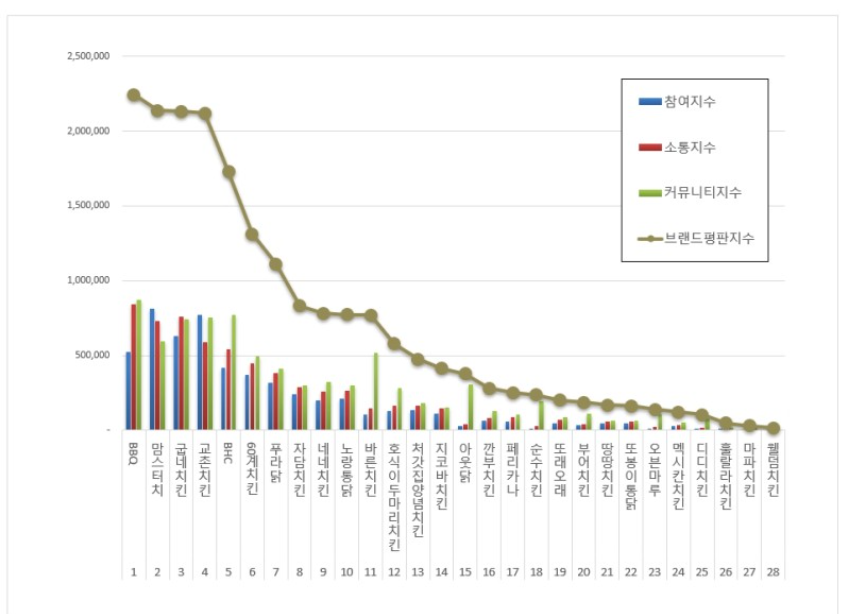

In [ ]:
df['가게'].unique()

array(['후라이드참잘하는집-서강대점', '청년치킨-서교점', '베이직프라이드치킨-신촌직영점', '지코바치킨-신촌점',
       '교촌치킨-신촌점', '순살만공격-마포신촌점', '푸라닭-신수점', '치킨플러스-성산점', '이나닭강정-신촌점',
       '맘스터치피자앤치킨-연대점', '지코바치킨-독립문점', '치킨플러스-서교점', 'BHC-신촌점',
       '골라먹는3가지맛디디치킨-연세대점', '굽네치킨&피자-서강점', '굽네치킨&피자-남가좌1호점', '치킨더홈-서울이대점',
       '굽네치킨&피자-이대역점', '맥시칸치킨-연희점', '오늘통닭-신촌점', '숯미남숯불치킨에미친남자',
       '수준이다른치킨-마포신촌점', '자담치킨-신촌점', '마깐마포깐풍기-신촌본점', '페리카나-이대점',
       '굽네치킨&피자-신촌점', '지코바치킨-홍대점', 'BHC-홍대초교점', '노랑통닭-아현점',
       '피자와치킨의러브레터-서대문점', '바른치킨-공덕파크자이점', '페리카나-합정동점', '지코바치킨-남가좌점',
       '롯데리아-홍대점', '컬투치킨-연남사랑점', '전국3대치킨오성통닭-마포신촌점', '쌀통에퐁닭', '네네치킨-서교점',
       '가마로강정-광흥창점', 'BHC-연희점', '멕시칸치킨-연남점', '골라먹는3가지맛디디치킨-아현점',
       '페리카나-홍익대점', '신미경홍대닭갈비3', '강정이기가막혀-연희점', 'BBQ-신촌점', '처갓집양념치킨-독립문점',
       '양념이맛있는순살킹-아현점', '호식이두마리치킨-명지대점', '신미불닭발-서울본점', '푸라닭-합정점',
       '티바두마리치킨-신수서강대점', 'BHC-공덕점', '호치킨-마포래미안푸르지오점', '치킨시대-명지대점'],
      dtype=object)

In [ ]:
#전체리뷰에서 해당 프렌차이즈의 비율

big_brand = ['교촌치킨-신촌점','맘스터치피자앤치킨-연대점','BHC-신촌점','굽네치킨&피자-서강점','굽네치킨&피자-남가좌1호점','굽네치킨&피자-이대역점','굽네치킨&피자-신촌점','BHC-홍대초교점','BHC-연희점','BBQ-신촌점','BHC-공덕점']
len(big_brand) / len(df['가게'].unique())

0.2

In [ ]:
#프랜차이즈 리뷰데이터만 가져오기

idx = []

for i in range(len(df)):
  if df.loc[i]['가게'] in big_brand:
    idx.append(i)

df_bigbrand = df.loc[idx,:]

In [ ]:
#광고아님 해당 프렌차이즈중에 맘스터치와 굽네를 제외한 나머지는 평점이 낮음
#이때 맘스터치는 솔직히 치킨보다는 버거를 위주로 하니 제외한다고 하였을때
#굽네만 평균이상이고 나머지 BBQ BHC 교촌은 평균보다 아래임을 확인 할 수 있다.

df_bigbrand.groupby('가게').mean()['맛']

가게
BBQ-신촌점           4.783133
BHC-공덕점           4.807560
BHC-신촌점           4.859589
BHC-연희점           4.865900
BHC-홍대초교점         4.877622
교촌치킨-신촌점          4.812734
굽네치킨&피자-남가좌1호점    4.968641
굽네치킨&피자-서강점       4.966102
굽네치킨&피자-신촌점       4.936170
굽네치킨&피자-이대역점      4.924138
맘스터치피자앤치킨-연대점     4.958333
Name: 맛, dtype: float64

In [ ]:
np.mean(df.groupby('가게').mean()['맛'])

4.887579326990433

In [ ]:
df_bigbrand.groupby('가게').var()['맛'].mean()

0.24567247228028527

In [ ]:
df.groupby('가게').var()['맛'].mean()

0.24127794959967222

결과

광고아님 해당 프렌차이즈중에 맘스터치와 굽네를 제외한 나머지는 평점이 낮음
이때 맘스터치는 솔직히 치킨보다는 버거를 위주로 하니 제외한다고 하였을때
굽네만 평균이상이고 나머지 BBQ BHC 교촌은 평균보다 아래임을 확인 할 수 있다.


- 차이가 크지는 않지만 프랜차이즈 가게들의 맛의 평점이 전체 평점보다 더 낮은 것을 확인
- 분산 역시 프랜차이즈의 분산이 더 커서 꼭 프랜차이즈가 맛을 보장하고 프랜차이즈여서 맛이 일관된다고 할 수는 없을 것 같다.

------------------------------------------------------------

In [ ]:
df_temp['총점']=df_temp['맛']+df_temp['양']

In [ ]:
df_temp.head()

,가게,맛,양,날짜,주문,사용자id,리뷰,normalize_doc,총점
0,후라이드참잘하는집-서강대점,5,5,2023-02-19,핫간장치킨（무＋소스＋콜라）,st,주문해놓고 샤워하고 나왔는데 바로 왔음 배달은 항상 빨라서 좋고 맛은 말할거 없이 ...,주문해놓고 샤워하고 나왔는데 바로 왔음 배달은 항상 빨라서 좋고 맛은 말할거 없이 ...,10
1,후라이드참잘하는집-서강대점,5,5,2023-02-18,순살 후라이드,yh,맛있어요 너무 맛ㅇㅅ어옿,맛있어요 너무 맛 어옿,10
2,후라이드참잘하는집-서강대점,5,5,2023-02-17,반마리（순살）,id,너무 맛있게 잘 먹렀어요. 머스터드 소스 넉넉히 주셔수 모자라지 않게 잘 먹었습니다.,너무 맛있게 잘 먹렀어요 머스터드 소스 넉넉히 주셔수 모자라지 않게 잘 먹었습니다,10
3,후라이드참잘하는집-서강대점,5,5,2023-02-16,반마리（순살）,rl,굳굳굳 잘 먹었습니당,굳굳굳 잘 먹었습니당,10
4,후라이드참잘하는집-서강대점,5,5,2023-02-16,핫토스치킨（뼈）（무＋소스＋콜라）,st,시즈닝 팍팍~넘 맛있었요 간만에 치킨 먹은건데 기분좋게 먹었어요,시즈닝 팍팍 넘 맛있었요 간만에 치킨 먹은건데 기분좋게 먹었어요,10


In [ ]:
df_temp['등급']=5
df_temp.loc[(df_temp['맛']==5) & (df_temp['양']==5),'등급']=1
df_temp.loc[(df_temp['맛']==5) & (df_temp['양']==4),'등급']=2
df_temp.loc[(df_temp['맛']==4) & (df_temp['양']==5),'등급']=3
df_temp.loc[(df_temp['맛']==4) & (df_temp['양']==4),'등급']=4

In [ ]:
df_temp.head()

,가게,맛,양,날짜,주문,사용자id,리뷰,normalize_doc,총점,등급
0,후라이드참잘하는집-서강대점,5,5,2023-02-19,핫간장치킨（무＋소스＋콜라）,st,주문해놓고 샤워하고 나왔는데 바로 왔음 배달은 항상 빨라서 좋고 맛은 말할거 없이 ...,주문해놓고 샤워하고 나왔는데 바로 왔음 배달은 항상 빨라서 좋고 맛은 말할거 없이 ...,10,1
1,후라이드참잘하는집-서강대점,5,5,2023-02-18,순살 후라이드,yh,맛있어요 너무 맛ㅇㅅ어옿,맛있어요 너무 맛 어옿,10,1
2,후라이드참잘하는집-서강대점,5,5,2023-02-17,반마리（순살）,id,너무 맛있게 잘 먹렀어요. 머스터드 소스 넉넉히 주셔수 모자라지 않게 잘 먹었습니다.,너무 맛있게 잘 먹렀어요 머스터드 소스 넉넉히 주셔수 모자라지 않게 잘 먹었습니다,10,1
3,후라이드참잘하는집-서강대점,5,5,2023-02-16,반마리（순살）,rl,굳굳굳 잘 먹었습니당,굳굳굳 잘 먹었습니당,10,1
4,후라이드참잘하는집-서강대점,5,5,2023-02-16,핫토스치킨（뼈）（무＋소스＋콜라）,st,시즈닝 팍팍~넘 맛있었요 간만에 치킨 먹은건데 기분좋게 먹었어요,시즈닝 팍팍 넘 맛있었요 간만에 치킨 먹은건데 기분좋게 먹었어요,10,1


In [ ]:
df_temp['등급'].value_counts()

1    11206
5      390
2      249
4      244
3      241
Name: 등급, dtype: int64

In [ ]:
df_temp.to_csv('df_6_final.csv',index = False,encoding="utf-8-sig")

### 평점이 좋으면 리뷰도 좋은 리뷰만 있을까??
- 얘는 아님

In [ ]:
#기존에 컬투치킨의 경우 평점이 제일 높았음

np.mean(df[df['가게'] == '컬투치킨-연남사랑점']['맛'])

4.976470588235294

In [ ]:
df_best = df[df['가게'] == '컬투치킨-연남사랑점']
df_best['맛'].value_counts()

5    249
4      6
Name: 맛, dtype: int64

### 치킨을 언제 많이 시켜먹을까?? 불금에 치킨일까??
- 요일별로 주문량을 시각화해보기
- 혹시 요일별로 평점이 차이가 많이 날까??
   - 주문이 많으면 배달이 많아서 오래 걸리거나 퀄리티가 낮아질까??

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df['월']=pd.to_datetime(df['날짜']).dt.month

In [ ]:
df['요일']=pd.to_datetime(df['날짜']).dt.weekday

In [ ]:
df['일']=pd.to_datetime(df['날짜']).dt.day

In [ ]:
df.head()

,가게,맛,양,날짜,주문,사용자id,리뷰,normalize_doc,총점,등급,월,요일,일
0,후라이드참잘하는집-서강대점,5,5,2023-02-19,핫간장치킨（무＋소스＋콜라）,st,주문해놓고 샤워하고 나왔는데 바로 왔음 배달은 항상 빨라서 좋고 맛은 말할거 없이 ...,주문해놓고 샤워하고 나왔는데 바로 왔음 배달은 항상 빨라서 좋고 맛은 말할거 없이 ...,10,1,2,6,19
1,후라이드참잘하는집-서강대점,5,5,2023-02-18,순살 후라이드,yh,맛있어요 너무 맛ㅇㅅ어옿,맛있어요 너무 맛 어옿,10,1,2,5,18
2,후라이드참잘하는집-서강대점,5,5,2023-02-17,반마리（순살）,id,너무 맛있게 잘 먹렀어요. 머스터드 소스 넉넉히 주셔수 모자라지 않게 잘 먹었습니다.,너무 맛있게 잘 먹렀어요 머스터드 소스 넉넉히 주셔수 모자라지 않게 잘 먹었습니다,10,1,2,4,17
3,후라이드참잘하는집-서강대점,5,5,2023-02-16,반마리（순살）,rl,굳굳굳 잘 먹었습니당,굳굳굳 잘 먹었습니당,10,1,2,3,16
4,후라이드참잘하는집-서강대점,5,5,2023-02-16,핫토스치킨（뼈）（무＋소스＋콜라）,st,시즈닝 팍팍~넘 맛있었요 간만에 치킨 먹은건데 기분좋게 먹었어요,시즈닝 팍팍 넘 맛있었요 간만에 치킨 먹은건데 기분좋게 먹었어요,10,1,2,3,16


0 : 월요일 <br>
1 : 화요일 <br>
2 : 수요일 <br>
3 : 목요일 <br>
4 : 금요일 <br>
5 : 토요일 <br>
6 : 일요일 <br>


In [ ]:
weekday=df['요일'].value_counts()
weekday.index = ['일요일','토요일','월요일','금요일','화요일','목요일','수요일']

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='요일'>

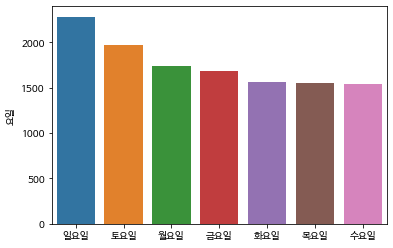

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.barplot(weekday.index,weekday)

결론
- 불금에 치킨보다는 휴일에 치킨이 더 주문이 많음
- 토요일이 더 많을 것이라고 예상했는데 일요일이 더많다!!
- 월요일에 치킨주문량이 더 많다. (월요병 치료??)

# 통계적 추천 시스템 구현하기

그리고 통계적 추천을 하기전에 EDA로 그래프를 그려보자



- 평점이 높은 순으로 추천해주기
  - mean으로 높은 것 추천
  - 분명 같은 평균이 있을텐데 다음 기준은 리뷰의 평점의 최솟값이 낮은 치킨집??, 
     분산이 낮은 치킨집??
- 등급이 높은 순으로 추천해주기
- 최근리뷰순이 많은 순으로 추천해주기

## 반대로 평점이 낮은 가게 뽑기
- 평점이 높은 순으로 추천해주기
- 등급이 높은 순으로 추천해주기
- 최근리뷰순이 많은 순으로 추천해주기



In [ ]:
df.head(3)

,가게,맛,양,날짜,주문,사용자id,리뷰,normalize_doc,총점,등급
0,후라이드참잘하는집-서강대점,5,5,2023-02-19,핫간장치킨（무＋소스＋콜라）,st,주문해놓고 샤워하고 나왔는데 바로 왔음 배달은 항상 빨라서 좋고 맛은 말할거 없이 ...,주문해놓고 샤워하고 나왔는데 바로 왔음 배달은 항상 빨라서 좋고 맛은 말할거 없이 ...,10,1
1,후라이드참잘하는집-서강대점,5,5,2023-02-18,순살 후라이드,yh,맛있어요 너무 맛ㅇㅅ어옿,맛있어요 너무 맛 어옿,10,1
2,후라이드참잘하는집-서강대점,5,5,2023-02-17,반마리（순살）,id,너무 맛있게 잘 먹렀어요. 머스터드 소스 넉넉히 주셔수 모자라지 않게 잘 먹었습니다.,너무 맛있게 잘 먹렀어요 머스터드 소스 넉넉히 주셔수 모자라지 않게 잘 먹었습니다,10,1


In [ ]:
#df.groupby(['가게']).mean()

#분석해보니 맛 평점은 컬투치킨이 제일 높음
#근데 컬투치킨이 제일 등급점수가 높은것은 아님 
df_group_shop = df.groupby('가게').mean()
df_group_shop.sort_values(by = '맛',ascending = False)

,맛,양,총점,등급,월,요일,일
가게,,,,,,,
컬투치킨-연남사랑점,4.976471,4.980392,9.956863,1.074510,6.752941,3.250980,15.635294
베이직프라이드치킨-신촌직영점,4.975862,4.979310,9.955172,1.068966,7.803448,3.017241,15.486207
치킨더홈-서울이대점,4.969466,4.973282,9.942748,1.072519,7.812977,3.393130,14.935115
굽네치킨&피자-남가좌1호점,4.968641,4.979094,9.947735,1.055749,8.000000,3.083624,13.965157
페리카나-홍익대점,4.967078,4.975309,9.942387,1.074074,7.909465,2.971193,17.152263
굽네치킨&피자-서강점,4.966102,4.955932,9.922034,1.125424,7.552542,3.027119,13.220339
맘스터치피자앤치킨-연대점,4.958333,4.947917,9.906250,1.135417,3.656250,3.062500,16.791667
티바두마리치킨-신수서강대점,4.956349,4.900794,9.857143,1.186508,5.341270,3.424603,16.269841
페리카나-합정동점,4.956044,4.972527,9.928571,1.104396,6.142857,2.884615,18.197802


In [ ]:
df_mean_10_idx=df_group_shop.sort_values('맛',ascending = False).head(10).index
df_mean_10_idx

Index(['컬투치킨-연남사랑점', '베이직프라이드치킨-신촌직영점', '치킨더홈-서울이대점', '굽네치킨&피자-남가좌1호점',
       '페리카나-홍익대점', '굽네치킨&피자-서강점', '맘스터치피자앤치킨-연대점', '티바두마리치킨-신수서강대점',
       '페리카나-합정동점', '오늘통닭-신촌점'],
      dtype='object', name='가게')

In [ ]:
good = []
for i in range(df.shape[0]):
  if df.loc[i]['가게'] in df_mean_10_idx.tolist():
    good.append(i)

#good

In [ ]:
df.loc[good,:].groupby('가게').var().sort_values('맛',ascending = True)


,맛,양,총점,등급,월,요일,일
가게,,,,,,,
컬투치킨-연남사랑점,0.023066,0.027173,0.065061,0.195214,19.037147,4.275344,82.815285
베이직프라이드치킨-신촌직영점,0.023637,0.027252,0.084489,0.188999,23.023517,4.695203,84.742024
굽네치킨&피자-서강점,0.032861,0.062677,0.140159,0.361766,24.894339,4.189738,80.879857
맘스터치피자앤치킨-연대점,0.040351,0.070943,0.170066,0.349890,21.027961,3.953947,116.714035
페리카나-합정동점,0.053306,0.037915,0.166140,0.292909,8.874507,3.550149,91.341874
오늘통닭-신촌점,0.061753,0.171102,0.368506,0.568662,16.506228,4.228983,69.480735
티바두마리치킨-신수서강대점,0.065816,0.177370,0.338076,0.566670,10.082274,4.237321,76.771517
치킨더홈-서울이대점,0.075692,0.026103,0.130809,0.205449,15.623892,5.465546,77.057076
페리카나-홍익대점,0.081556,0.024181,0.120634,0.184573,5.900860,3.680985,69.840356


In [ ]:
#평점이 높은 상위 k개의 치킨집을 불러옴
def mean_rem(df,k,reverse):
  df_group_shop = df.groupby('가게').mean()
  df_group_shop.sort_values(by = '맛',ascending = reverse,inplace = True)
  
  return df_group_shop.head(k)

In [ ]:
#reverse를 true로 하면 평점이 낮은 순으로 나옴

mean_rem(df,5,True)

,맛,양,총점,등급,월,요일,일
가게,,,,,,,
숯미남숯불치킨에미친남자,4.709302,4.697674,9.406977,1.627907,7.965116,3.046512,14.976744
호식이두마리치킨-명지대점,4.709898,4.802048,9.511945,1.525597,8.040956,3.129693,15.897611
BBQ-신촌점,4.783133,4.722892,9.506024,1.481928,8.915663,3.228916,15.481928
지코바치킨-독립문점,4.795539,4.892193,9.687732,1.330855,8.003717,3.197026,15.022305
전국3대치킨오성통닭-마포신촌점,4.802326,4.856589,9.658915,1.344961,6.631783,3.310078,14.872093


In [ ]:
#FALSE로 하면 높은 순서대로 나옴

mean_rem(df,5,False)

,맛,양,총점,등급
가게,,,,
컬투치킨-연남사랑점,4.976471,4.980392,9.956863,1.074510
베이직프라이드치킨-신촌직영점,4.975862,4.979310,9.955172,1.068966
치킨더홈-서울이대점,4.969466,4.973282,9.942748,1.072519
굽네치킨&피자-남가좌1호점,4.968641,4.979094,9.947735,1.055749
페리카나-홍익대점,4.967078,4.975309,9.942387,1.074074


In [ ]:
#상위 k개로 추천을 하고 치킨은 어느정도 평점이 높으니 분산이 다음에는 분산이 낮은걸로 적용하자
def var_rem(df,k,reverse):
  df_mean_k = mean_rem(df,k,reverse)
  print(pd.DataFrame(df_mean_k))
  print("--------------")
  
  df_mean_k_idx = df_mean_k.index
  

  good = []
  for i in range(df.shape[0]):
    if df.loc[i]['가게'] in df_mean_k_idx.tolist():
      good.append(i)
  result =df.loc[good,:].groupby('가게').var().sort_values('맛',ascending = reverse)
  print('평점이 높은 상위 k개중에 평점의 분산이 낮은 k개의 가게')
  return result

In [ ]:
var_rem(df,5,True)

                         맛         양        총점        등급         월        요일  \
가게                                                                             
숯미남숯불치킨에미친남자      4.709302  4.697674  9.406977  1.627907  7.965116  3.046512   
호식이두마리치킨-명지대점     4.709898  4.802048  9.511945  1.525597  8.040956  3.129693   
BBQ-신촌점           4.783133  4.722892  9.506024  1.481928  8.915663  3.228916   
지코바치킨-독립문점        4.795539  4.892193  9.687732  1.330855  8.003717  3.197026   
전국3대치킨오성통닭-마포신촌점  4.802326  4.856589  9.658915  1.344961  6.631783  3.310078   

                          일  
가게                           
숯미남숯불치킨에미친남자      14.976744  
호식이두마리치킨-명지대점     15.897611  
BBQ-신촌점           15.481928  
지코바치킨-독립문점        15.022305  
전국3대치킨오성통닭-마포신촌점  14.872093  
--------------
평점이 높은 상위 k개중에 평점의 분산이 낮은 k개의 가게


,맛,양,총점,등급,월,요일,일
가게,,,,,,,
지코바치킨-독립문점,0.506547,0.327887,1.417050,0.990873,16.787300,4.688648,73.514426
BBQ-신촌점,0.513371,0.690567,2.204232,1.447840,8.639142,4.276227,72.521011
전국3대치킨오성통닭-마포신촌점,0.524975,0.294528,1.439628,1.028399,11.338597,4.284801,79.839607
숯미남숯불치킨에미친남자,0.608618,0.519289,2.079480,1.695212,11.516416,4.186047,67.105335
호식이두마리치킨-명지대점,0.631306,0.460681,1.880850,1.510473,12.573659,3.585862,77.701809


최근리뷰에 따라서 추천하기
- 최근의 정의를 뭘로할까? 한달??
- 최근리뷰만 놓고 분석하기(한달내에 평점을 이용하기)
- 최근 리뷰가 많은 순으로 추천하기

In [ ]:
import datetime

In [ ]:
#2023년의 리뷰만 가져오기

year_list = []

for i in range(df.shape[0]):
  if df.loc[i]['날짜'][:4] == '2023':
    year_list.append(i)


In [ ]:
#가져와서 df_2023에 저장
df_2023 = df.loc[year_list,:]

In [ ]:
#최근에 좋다는 것을 알 수 있음. but 전부 5점이고 전부 1등급은 약간 이상함
#원인1) 2023에 리뷰가 1개밖에 없는데도 있음
#따라서 이것만 하면 애매하니 최근리뷰가 많은순으로 추천한다음 거기서 다시 평균과 분산을 쓰는게 맞다.



#리뷰 분석을 통해서 전부 다 좋은지 파악 필요
#분산도 알아보자
#2023에 평점이 낮은데는 뭐지?


df_2023.groupby('가게').mean().sort_values('맛',ascending = False)

,맛,양,총점,등급,월,요일,일
가게,,,,,,,
BBQ-신촌점,5.000000,5.000000,10.000000,1.000000,1.000000,6.000000,15.000000
마깐마포깐풍기-신촌본점,5.000000,4.750000,9.750000,1.500000,1.500000,4.375000,13.625000
푸라닭-합정점,5.000000,5.000000,10.000000,1.000000,1.500000,2.500000,6.500000
페리카나-홍익대점,5.000000,5.000000,10.000000,1.000000,1.153846,2.692308,15.000000
페리카나-이대점,5.000000,5.000000,10.000000,1.000000,1.500000,1.666667,13.833333
컬투치킨-연남사랑점,5.000000,5.000000,10.000000,1.000000,1.402062,2.855670,14.185567
치킨더홈-서울이대점,5.000000,5.000000,10.000000,1.000000,1.485294,3.294118,13.720588
전국3대치킨오성통닭-마포신촌점,5.000000,5.000000,10.000000,1.000000,1.500000,3.125000,12.375000
자담치킨-신촌점,5.000000,4.857143,9.857143,1.142857,1.000000,3.428571,21.428571


In [ ]:
df_2023.groupby('가게').var().sort_values('맛',ascending = False)

,맛,양,총점,등급
가게,,,,
치킨시대-명지대점,1.230769,1.230769,4.923077,1.230769
처갓집양념치킨-독립문점,1.035404,0.530228,2.862112,1.405590
치킨플러스-서교점,0.685919,0.267943,1.530417,1.358168
호식이두마리치킨-명지대점,0.644156,0.599675,2.360714,1.778896
지코바치킨-독립문점,0.549100,0.553795,2.015649,1.086072
순살만공격-마포신촌점,0.533333,0.533333,2.133333,0.533333
교촌치킨-신촌점,0.470588,0.143494,1.077540,0.492870
치킨플러스-성산점,0.437081,0.233396,1.221540,0.672697
BHC-공덕점,0.405396,0.386528,1.414036,0.988538


In [ ]:
#평점이 너무 높고 분산이 0이길레 보니 이런문제 발생


df_2023[df_2023['가게'] == '자담치킨-신촌점']['맛'].value_counts()

5    7
Name: 맛, dtype: int64

In [ ]:
df_2023.groupby('가게').count().sort_values('리뷰',ascending = False)

,맛,양,날짜,주문,사용자id,리뷰,normalize_doc,총점,등급
가게,,,,,,,,,
굽네치킨&피자-이대역점,271,271,271,271,271,271,271,271,271
BHC-홍대초교점,227,227,227,227,227,227,226,227,227
치킨플러스-성산점,146,146,146,146,146,146,145,146,146
신미경홍대닭갈비3,138,138,138,138,138,138,137,138,138
굽네치킨&피자-서강점,114,114,114,114,114,114,114,114,114
BHC-공덕점,107,107,107,107,107,107,106,107,107
베이직프라이드치킨-신촌직영점,105,105,105,105,105,105,104,105,105
컬투치킨-연남사랑점,97,97,97,97,97,97,96,97,97
지코바치킨-신촌점,94,94,94,94,94,94,93,94,94


In [ ]:
year_idx = df_2023.groupby('가게').count().sort_values('리뷰',ascending = False).head(10).index

In [ ]:
df_res_year=[]
for i in range(df.shape[0]):
  if df.loc[i]['가게'] in year_idx.tolist():
    df_res_year.append(i)

df_year_final = df.loc[df_res_year,:]

In [ ]:
df_year_final.groupby('가게').var().sort_values('맛',ascending= True)

,맛,양,총점,등급
가게,,,,
컬투치킨-연남사랑점,0.023066,0.027173,0.065061,0.195214
베이직프라이드치킨-신촌직영점,0.023637,0.027252,0.084489,0.188999
굽네치킨&피자-서강점,0.032861,0.062677,0.140159,0.361766
청년치킨-서교점,0.155445,0.191800,0.529132,0.583002
굽네치킨&피자-이대역점,0.160315,0.140091,0.438480,0.611574
지코바치킨-신촌점,0.210936,0.238046,0.823725,0.515214
신미경홍대닭갈비3,0.211701,0.193172,0.562006,0.713969
치킨플러스-성산점,0.283996,0.146918,0.741260,0.523712
BHC-홍대초교점,0.318305,0.179855,0.824991,0.773169


In [ ]:
def review_rem(df,k):
  year_idx = df.groupby('가게').count().sort_values('리뷰',ascending = False).head(k).index
  df_res_year=[]
  for i in range(df.shape[0]):
    if df.loc[i]['가게'] in year_idx.tolist():
      df_res_year.append(i)

  df_year_final = df.loc[df_res_year,:]
  res =df_year_final.groupby('가게').var().sort_values('맛',ascending= True)

  return res

In [ ]:
review_rem(df,10)

,맛,양,총점,등급,월,요일,일
가게,,,,,,,
베이직프라이드치킨-신촌직영점,0.023637,0.027252,0.084489,0.188999,23.023517,4.695203,84.742024
굽네치킨&피자-서강점,0.032861,0.062677,0.140159,0.361766,24.894339,4.189738,80.879857
골라먹는3가지맛디디치킨-아현점,0.101614,0.085753,0.294703,0.612466,16.153298,4.479626,85.902330
굽네치킨&피자-이대역점,0.160315,0.140091,0.438480,0.611574,7.265243,3.865756,90.416716
이나닭강정-신촌점,0.251404,0.301410,0.903472,0.846167,17.957365,4.081218,74.640550
BHC-신촌점,0.292932,0.279186,1.068634,0.936909,15.381855,4.608142,73.318870
푸라닭-신수점,0.323637,0.183033,0.819998,0.756485,11.486565,4.355626,83.513435
순살만공격-마포신촌점,0.417719,0.396898,1.480551,0.978833,8.109963,4.411419,89.224961
BHC-공덕점,0.418012,0.322100,1.239270,1.133404,19.854533,4.226757,56.681645


# mf를 이용한 협업필터링으로 추천하기
- pivot-table를 만들기 
- rmse를 구하고 추천해보기
- surprise를 이용해서 추천하기

In [ ]:
df.head()

,가게,맛,양,날짜,주문,사용자id,리뷰,normalize_doc,총점,등급
0,후라이드참잘하는집-서강대점,5,5,2023-02-19,핫간장치킨（무＋소스＋콜라）,st,주문해놓고 샤워하고 나왔는데 바로 왔음 배달은 항상 빨라서 좋고 맛은 말할거 없이 ...,주문해놓고 샤워하고 나왔는데 바로 왔음 배달은 항상 빨라서 좋고 맛은 말할거 없이 ...,10,1
1,후라이드참잘하는집-서강대점,5,5,2023-02-18,순살 후라이드,yh,맛있어요 너무 맛ㅇㅅ어옿,맛있어요 너무 맛 어옿,10,1
2,후라이드참잘하는집-서강대점,5,5,2023-02-17,반마리（순살）,id,너무 맛있게 잘 먹렀어요. 머스터드 소스 넉넉히 주셔수 모자라지 않게 잘 먹었습니다.,너무 맛있게 잘 먹렀어요 머스터드 소스 넉넉히 주셔수 모자라지 않게 잘 먹었습니다,10,1
3,후라이드참잘하는집-서강대점,5,5,2023-02-16,반마리（순살）,rl,굳굳굳 잘 먹었습니당,굳굳굳 잘 먹었습니당,10,1
4,후라이드참잘하는집-서강대점,5,5,2023-02-16,핫토스치킨（뼈）（무＋소스＋콜라）,st,시즈닝 팍팍~넘 맛있었요 간만에 치킨 먹은건데 기분좋게 먹었어요,시즈닝 팍팍 넘 맛있었요 간만에 치킨 먹은건데 기분좋게 먹었어요,10,1


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

#기존 R을 가지고 초기화된 P,Q행렬을 이용해서 에러를 구한다음에 에러를 리턴하는 함수 
def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두개의 분해된 행렬 P와 Q.T의 내적 곱으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
    
    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
      
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

In [ ]:
#R은 기존 평점 행렬
#K는 P,Q를 초기화하기 위한 상수


def matrix_factorization(R, K, steps=200, learning_rate=0.01, r_lambda = 0.01):
    num_users, num_items = R.shape
    # P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 랜덤한 값으로 입력합니다. 
    np.random.seed(1)
    P = np.random.normal(scale=1./K, size=(num_users, K))
    Q = np.random.normal(scale=1./K, size=(num_items, K))

    break_count = 0
       
    # R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트 객체에 저장. 
    # NON-ZERO: 사용자가 먹은 치킨들만 따로 행렬을 만들음
    non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]
   
    # SGD기법으로 P와 Q 매트릭스를 계속 업데이트. 
    for step in range(steps):
        for i, j, r in non_zeros:
            # 실제 값과 예측 값의 차이인 오류 값 구함
            eij = r - np.dot(P[i, :], Q[j, :].T)
            # Regularization을 반영한 SGD 업데이트 공식 적용
            P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
            Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
       
        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 10) == 0 :
            print("### iteration step : ", step," rmse : ", rmse)
            
    return P, Q,rmse

user_item 행렬을 위해서 pivot_table로 데이터 변형하기

In [ ]:
ratings_matrix = df.pivot_table('맛', index='사용자id', columns='주문')

In [ ]:
ratings_matrix

주문,1.순살후라이드＋순살후라이드＋콜라1.25L,100% 가평잣으로 만든 고소치킨,100%청,1마리 3가지맛세트 오리지널,1마리 3가지맛세트 오리지널（순살）,1마리 3가지맛세트 오리지널＋리틀꿔바로우,1마리 3가지맛세트 오리지널＋포테이토치즈볼（5개）,1마리 3가지맛세트 오리지널＋한입붕어빵（6개）,1마리 3가지맛세트 오리지널＋후루룩떡볶이,1마리 골라먹는 3가지맛세트,...,（후라이드 순살）빠삭킹 마늘 간장 반마리,（후라이드 순살）빠삭킹 반마리,（후라이드 순살）빠삭킹 화이트 크림 반마리,（후라이드치킨）,（후라이드치킨）（중）,（후라이드）빠삭킹 눈꽃치즈 반 반 （추천메뉴）,（후라이드）빠삭킹 마늘간장 반 반 （추천메뉴）,（후라이드）빠삭킹 볼케이노 반 반 （매운맛마니아）,（후라이드）빠삭킹 오리지널,（후라이드）빠삭킹（판매1위）
사용자id,,,,,,,,,,,,,,,,,,,,,
-_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#best rmse :  0.04969558738935449
#P,Q를 만들고 SGD방법으로 에러 갱신하기 (평가지표 RMSE)
#만들어진 PQ를 가지고 곱해서 예측 행렬 만들기

P, Q,rmse = matrix_factorization(ratings_matrix.values, K=50, steps=200, learning_rate=0.01, r_lambda = 0.01)
pred_matrix = np.dot(P, Q.T)

### iteration step :  0  rmse :  4.8951221380869105
### iteration step :  10  rmse :  1.2430796012716565
### iteration step :  20  rmse :  0.690406339269562
### iteration step :  30  rmse :  0.4650977916214984
### iteration step :  40  rmse :  0.3418230823095762
### iteration step :  50  rmse :  0.2620866359238788
### iteration step :  60  rmse :  0.19978957187206126
### iteration step :  70  rmse :  0.1525514729247504
### iteration step :  80  rmse :  0.12266125979746145
### iteration step :  90  rmse :  0.10412970851938211
### iteration step :  100  rmse :  0.09133001269191322
### iteration step :  110  rmse :  0.08173631565860187
### iteration step :  120  rmse :  0.07423183450591636
### iteration step :  130  rmse :  0.06823198790212999
### iteration step :  140  rmse :  0.063386634942216
### iteration step :  150  rmse :  0.05945658868810413
### iteration step :  160  rmse :  0.056257874551176285
### iteration step :  170  rmse :  0.05364106082678603
### iteration step :  180  rms

In [ ]:
from sklearn.model_selection import ParameterGrid

min = 50000 


grid = ParameterGrid({
    'K':[30,40,50,60],
    "learning_rate": [0.01,0.001,0.1,0.02,0.025],
    'r_lambda':[0.01,0.02,0.03,0.001]
})

err = []

for params in grid:
    
    try:
      P, Q,rmse = matrix_factorization(ratings_matrix.values, K=params['K'], steps=200, learning_rate=params['learning_rate'], r_lambda = params['r_lambda'])
      
      if rmse < min:
        min = rmse
        best_parm = params

    except:
      err.append(params)
print(min)
print(best_parm)

### iteration step :  0  rmse :  4.893481644676625
### iteration step :  10  rmse :  1.2282938186769443
### iteration step :  20  rmse :  0.6740020376601249
### iteration step :  30  rmse :  0.4516582954301773
### iteration step :  40  rmse :  0.33208794837459527
### iteration step :  50  rmse :  0.2546439797134041
### iteration step :  60  rmse :  0.19644712786408614
### iteration step :  70  rmse :  0.15610803517259078
### iteration step :  80  rmse :  0.13094712855374235
### iteration step :  90  rmse :  0.11427972722334605
### iteration step :  100  rmse :  0.10208120729757063
### iteration step :  110  rmse :  0.09262656354498157
### iteration step :  120  rmse :  0.08508521807307125
### iteration step :  130  rmse :  0.07897590174728839
### iteration step :  140  rmse :  0.0739770029123342
### iteration step :  150  rmse :  0.06985191503407455
### iteration step :  160  rmse :  0.06641882355613075
### iteration step :  170  rmse :  0.06353696713163996
### iteration step :  180  r

<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: invalid value encountered in subtract
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: invalid value encountered in add
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: invalid value encountered

### iteration step :  0  rmse :  4.343109851037711
### iteration step :  10  rmse :  0.6378559730876193
### iteration step :  20  rmse :  0.33206137752570963
### iteration step :  30  rmse :  0.20131994670839418
### iteration step :  40  rmse :  0.13822536604522057
### iteration step :  50  rmse :  0.10871685851934082
### iteration step :  60  rmse :  0.0906446094175509
### iteration step :  70  rmse :  0.07859802938049802
### iteration step :  80  rmse :  0.07024416814818826
### iteration step :  90  rmse :  0.06424345166428173
### iteration step :  100  rmse :  0.05979812897940701
### iteration step :  110  rmse :  0.05642436167784677
### iteration step :  120  rmse :  0.05381397544779652
### iteration step :  130  rmse :  0.05176073036324323
### iteration step :  140  rmse :  0.0501215296749872
### iteration step :  150  rmse :  0.0487946320460987
### iteration step :  160  rmse :  0.047706428345797816
### iteration step :  170  rmse :  0.046802918429758596
### iteration step :  180

<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])


### iteration step :  0  rmse :  3.846626953590596


<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])


### iteration step :  0  rmse :  3.8454559085234625


<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])


### iteration step :  0  rmse :  3.852726472661847


<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])


### iteration step :  0  rmse :  4.893554540311513
### iteration step :  10  rmse :  1.2323522722762719
### iteration step :  20  rmse :  0.6845049558128176
### iteration step :  30  rmse :  0.46237062099843523
### iteration step :  40  rmse :  0.34071841500105454
### iteration step :  50  rmse :  0.26030870541828405
### iteration step :  60  rmse :  0.19799966471378946
### iteration step :  70  rmse :  0.15320202651873666
### iteration step :  80  rmse :  0.12560959685880457
### iteration step :  90  rmse :  0.10817796664186603
### iteration step :  100  rmse :  0.0958745652103631
### iteration step :  110  rmse :  0.08651500772740112
### iteration step :  120  rmse :  0.07909144505944689
### iteration step :  130  rmse :  0.07306281369014724
### iteration step :  140  rmse :  0.0681104242364151
### iteration step :  150  rmse :  0.06402638171536525
### iteration step :  160  rmse :  0.06065406292393873
### iteration step :  170  rmse :  0.05786187588142684
### iteration step :  180  

<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: invalid value encountered in add
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: invalid value encountered in add
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: invalid value encountered in s

### iteration step :  0  rmse :  4.382709857955516
### iteration step :  10  rmse :  0.6474671174139253
### iteration step :  20  rmse :  0.339869776217435
### iteration step :  30  rmse :  0.20420045699531642
### iteration step :  40  rmse :  0.13594326519440872
### iteration step :  50  rmse :  0.10586154441736327
### iteration step :  60  rmse :  0.08768633039949744
### iteration step :  70  rmse :  0.0753573447652268
### iteration step :  80  rmse :  0.06671330931979672
### iteration step :  90  rmse :  0.060553366905847686
### iteration step :  100  rmse :  0.05604958714429047
### iteration step :  110  rmse :  0.052669064631571644
### iteration step :  120  rmse :  0.050079728042098176
### iteration step :  130  rmse :  0.048064583852038816
### iteration step :  140  rmse :  0.046474315160446096
### iteration step :  150  rmse :  0.045202873013818125
### iteration step :  160  rmse :  0.044173533921244935
### iteration step :  170  rmse :  0.04333007131750535
### iteration step :

<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: invalid value encountered in subtract
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])


### iteration step :  0  rmse :  3.8814135391839426


<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])


### iteration step :  0  rmse :  3.8825872847137344


<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: invalid value encountered in add
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])


### iteration step :  0  rmse :  3.882030384185163


<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])


### iteration step :  0  rmse :  4.8951221380869105
### iteration step :  10  rmse :  1.2430796012716565
### iteration step :  20  rmse :  0.690406339269562
### iteration step :  30  rmse :  0.4650977916214984
### iteration step :  40  rmse :  0.3418230823095762
### iteration step :  50  rmse :  0.2620866359238788
### iteration step :  60  rmse :  0.19978957187206126
### iteration step :  70  rmse :  0.1525514729247504
### iteration step :  80  rmse :  0.12266125979746145
### iteration step :  90  rmse :  0.10412970851938211
### iteration step :  100  rmse :  0.09133001269191322
### iteration step :  110  rmse :  0.08173631565860187
### iteration step :  120  rmse :  0.07423183450591636
### iteration step :  130  rmse :  0.06823198790212999
### iteration step :  140  rmse :  0.063386634942216
### iteration step :  150  rmse :  0.05945658868810413
### iteration step :  160  rmse :  0.056257874551176285
### iteration step :  170  rmse :  0.05364106082678603
### iteration step :  180  rms

<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: invalid value encountered in add
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: invalid value encountered in add
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multip

### iteration step :  0  rmse :  4.454319235502563
### iteration step :  10  rmse :  0.6505326803750823
### iteration step :  20  rmse :  0.3373519774480415
### iteration step :  30  rmse :  0.2012741297603079
### iteration step :  40  rmse :  0.12801375793077396
### iteration step :  50  rmse :  0.09693319268056645
### iteration step :  60  rmse :  0.07881767053491813
### iteration step :  70  rmse :  0.06691389994585159
### iteration step :  80  rmse :  0.058883390868410886
### iteration step :  90  rmse :  0.05338711783705036
### iteration step :  100  rmse :  0.049541495101850436
### iteration step :  110  rmse :  0.046790442637213464
### iteration step :  120  rmse :  0.044783733893316316
### iteration step :  130  rmse :  0.043292837210729185
### iteration step :  140  rmse :  0.042164508750227266
### iteration step :  150  rmse :  0.04129440090932197
### iteration step :  160  rmse :  0.04061072749844785
### iteration step :  170  rmse :  0.04006363285253448
### iteration step :

<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])


### iteration step :  0  rmse :  3.9708218214823767


<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: invalid value encountered in add
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])


### iteration step :  0  rmse :  3.9740755427052465


<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])


### iteration step :  0  rmse :  3.966585945233771


<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: invalid value encountered in add
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])


### iteration step :  0  rmse :  4.8955278058892775
### iteration step :  10  rmse :  1.2499598665238125
### iteration step :  20  rmse :  0.7005319876215398
### iteration step :  30  rmse :  0.47795271822213764
### iteration step :  40  rmse :  0.35448256875408646
### iteration step :  50  rmse :  0.2730057804178378
### iteration step :  60  rmse :  0.2088090868684774
### iteration step :  70  rmse :  0.15876740422087382
### iteration step :  80  rmse :  0.1262761915625575
### iteration step :  90  rmse :  0.10616816679372354
### iteration step :  100  rmse :  0.09246479524450074
### iteration step :  110  rmse :  0.08231759925826126
### iteration step :  120  rmse :  0.07444134119335391
### iteration step :  130  rmse :  0.06815588064237839
### iteration step :  140  rmse :  0.06306582818257346
### iteration step :  150  rmse :  0.058924368330561375
### iteration step :  160  rmse :  0.05555679503064221
### iteration step :  170  rmse :  0.05282024483325973
### iteration step :  180 

<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: invalid value encountered in add
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: invalid value encountered in subtract
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: invalid value encountered

### iteration step :  0  rmse :  4.4504616692388135
### iteration step :  10  rmse :  0.6620565340319002
### iteration step :  20  rmse :  0.3521765067629361
### iteration step :  30  rmse :  0.21272391672360888
### iteration step :  40  rmse :  0.13456793901349218
### iteration step :  50  rmse :  0.10113715192276299
### iteration step :  60  rmse :  0.0818373569741244
### iteration step :  70  rmse :  0.06907618663768475
### iteration step :  80  rmse :  0.060350099914316155
### iteration step :  90  rmse :  0.054361032438468015
### iteration step :  100  rmse :  0.05018117718055123
### iteration step :  110  rmse :  0.04718493396679265
### iteration step :  120  rmse :  0.044985717695436016
### iteration step :  130  rmse :  0.043340137018605236
### iteration step :  140  rmse :  0.04208759682214828
### iteration step :  150  rmse :  0.04111873310427467
### iteration step :  160  rmse :  0.04035768747789113
### iteration step :  170  rmse :  0.039751130225086716
### iteration step :

<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: invalid value encountered in subtract
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])


### iteration step :  0  rmse :  3.9601295372729326


<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])


### iteration step :  0  rmse :  3.962917704832969


<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])


### iteration step :  0  rmse :  3.9570233726197714
0.007317982724473721
{'K': 60, 'learning_rate': 0.02, 'r_lambda': 0.001}


<ipython-input-29-a8334fbd89f6>:25: RuntimeWarning: overflow encountered in multiply
  Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: overflow encountered in multiply
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
<ipython-input-29-a8334fbd89f6>:24: RuntimeWarning: invalid value encountered in add
  P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])


In [ ]:
best_parm

{'K': 60, 'learning_rate': 0.02, 'r_lambda': 0.001}

In [ ]:
min

0.007317982724473721

과적합인지? 좋은모델인지? 이건 모름

하이퍼 파라미터 튜닝 결과 
- 0.007 정도로 rmse가 낮게 나옴
- {'K': 60, 'learning_rate': 0.02, 'r_lambda': 0.001}

In [ ]:
P, Q,rmse = matrix_factorization(ratings_matrix.values, K=60, steps=200, learning_rate=0.02, r_lambda = 0.001)
pred_matrix = np.dot(P, Q.T)

### iteration step :  0  rmse :  4.444646878107105
### iteration step :  10  rmse :  0.661601484687493
### iteration step :  20  rmse :  0.34231170172558834
### iteration step :  30  rmse :  0.19494471022939083
### iteration step :  40  rmse :  0.11357692498647996
### iteration step :  50  rmse :  0.08184708264562904
### iteration step :  60  rmse :  0.06395872989187068
### iteration step :  70  rmse :  0.05065459706130137
### iteration step :  80  rmse :  0.04001034940217359
### iteration step :  90  rmse :  0.03160214632329212
### iteration step :  100  rmse :  0.025091328216712575
### iteration step :  110  rmse :  0.020156446588252573
### iteration step :  120  rmse :  0.01652527504113805
### iteration step :  130  rmse :  0.013937334783142685
### iteration step :  140  rmse :  0.012127706209944831
### iteration step :  150  rmse :  0.010846316913473241
### iteration step :  160  rmse :  0.009888816579768034
### iteration step :  170  rmse :  0.009113660856465429
### iteration step

In [ ]:
#예측된 행렬을 데이터 프레임화하기

ratings_pred_matrix = pd.DataFrame(data=pred_matrix, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)

ratings_pred_matrix.head(3)

주문,1.순살후라이드＋순살후라이드＋콜라1.25L,100% 가평잣으로 만든 고소치킨,100%청,1마리 3가지맛세트 오리지널,1마리 3가지맛세트 오리지널（순살）,1마리 3가지맛세트 오리지널＋리틀꿔바로우,1마리 3가지맛세트 오리지널＋포테이토치즈볼（5개）,1마리 3가지맛세트 오리지널＋한입붕어빵（6개）,1마리 3가지맛세트 오리지널＋후루룩떡볶이,1마리 골라먹는 3가지맛세트,...,（후라이드 순살）빠삭킹 마늘 간장 반마리,（후라이드 순살）빠삭킹 반마리,（후라이드 순살）빠삭킹 화이트 크림 반마리,（후라이드치킨）,（후라이드치킨）（중）,（후라이드）빠삭킹 눈꽃치즈 반 반 （추천메뉴）,（후라이드）빠삭킹 마늘간장 반 반 （추천메뉴）,（후라이드）빠삭킹 볼케이노 반 반 （매운맛마니아）,（후라이드）빠삭킹 오리지널,（후라이드）빠삭킹（판매1위）
사용자id,,,,,,,,,,,,,,,,,,,,,
-_,0.161844,0.085978,-0.032191,0.174635,0.194188,0.259135,0.256515,0.478770,-0.157028,0.045803,...,0.289973,0.141591,0.164926,0.145554,0.274045,0.115503,-0.171571,0.133896,0.242984,0.168172
-e,4.527535,4.623054,4.851432,4.451713,4.296845,4.642297,4.677430,4.818575,4.730107,4.669668,...,4.846343,4.853471,4.587834,4.271282,4.227186,4.594724,4.737914,4.793052,4.823725,4.888271
-s,2.475691,2.546031,2.558398,2.418267,2.384741,2.503048,2.586382,2.617401,2.668710,2.550531,...,2.638621,2.649231,2.483929,2.378857,2.165627,2.495771,2.586684,2.619616,2.659736,2.648345


In [ ]:
df['사용자id'].unique

<bound method Series.unique of 0        st
1        yh
2        id
3        rl
4        st
         ..
12325    ju
12326    sn
12327    ny
12328    im
12329    wk
Name: 사용자id, Length: 12330, dtype: object>

In [ ]:

def get_unate_food(ratings_matrix, userId):
    # userId로 입력받은 사용자의 모든 치킨을 주문한 정보를 추출하여 Series로 반환함. 
    # 반환된 user_rating 은 메뉴이름(주문)을 index로 가지는 Series 객체임. 
    user_rating = ratings_matrix.loc[userId,:]
    
    # user_rating이 0보다 크면 주문한 치킨임. 대상 index를 추출하여 list 객체로 만듬
    already_ate = user_rating[ user_rating > 0].index.tolist()
    
    # 모든 음식이름을 list 객체로 만듬. 
    order_list = ratings_matrix.columns.tolist()
    

    unate_list = [ food for food in order_list if food not in already_ate]
    
    return unate_list

In [ ]:

def recomm_food_by_userid(pred_df, userId, unseen_list, top_n=10):
    # 예측 평점 DataFrame에서 사용자id index와 unseen_list로 들어온 치킨 이름을 추출하여
    # 가장 예측 평점이 높은 순으로 정렬함. 
    recomm_chicken = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_chicken

In [ ]:
# 'yh'라는 사용자가 먹어보지 않은 치킨리스트 만들기 
unseen_list = get_unate_food(ratings_matrix, 'yh')

# 아이템 기반의 인접 이웃 협업 필터링으로 치킨 추천 
recomm_chicken = recomm_food_by_userid(ratings_pred_matrix, 'yh', unseen_list, top_n=10)

# 평점 데이타를 DataFrame으로 생성. 
recomm_chickens = pd.DataFrame(data=recomm_chicken.values,index=recomm_chicken.index,columns=['pred_score'])
recomm_chickens

,pred_score
주문,
순살치킨 ＋ 순살치킨,5.736646
크리스피치킨,5.272436
치파포 세트 V5,5.240229
후라이드 콤보,5.176459
순한맛1박스,5.170542
닭갈비볶음밥＋우동세트,5.106739
（KING푸짐） 로제닭볶이 2~4인용,5.042074
콘소메이징,5.039892
슈프림,5.037097


In [ ]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=3366548 sha256=0229df5ecbfe2ae7dd7708af6bdca83fa03727480cecd6e3857879bcae6f9eb2
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [ ]:
import surprise 

In [ ]:
from surprise import SVD
from surprise import Dataset 
from surprise import accuracy 
from surprise.model_selection import train_test_split

In [ ]:
df_sus = df[['사용자id','주문','맛']]
df_sus.head()

,사용자id,주문,맛
0,st,핫간장치킨（무＋소스＋콜라）,5
1,yh,순살 후라이드,5
2,id,반마리（순살）,5
3,rl,반마리（순살）,5
4,st,핫토스치킨（뼈）（무＋소스＋콜라）,5


일반데이터는 안되니 해당 주소를 참조해서 새롭게 데이터를 가공해서 사용하기
- surprise라이브러리를 사용하려면 칼럼은 userid,itemid,ratings의 순으로 있어야 하고 기존의 판다스 데이터 프레임은 사용못함
- https://github.com/NicolasHug/Surprise/issues/20

In [ ]:
df_sus.columns = ['userID','itemID','rating']

In [ ]:
from surprise import Reader
reader = Reader(line_format='user item rating', rating_scale=(1, 5))

In [ ]:
from surprise import dataset


class MyDataset(dataset.DatasetAutoFolds):

    def __init__(self, df, reader):

        self.raw_ratings = [(uid, iid, r, None) for (uid, iid, r) in
                            zip(df['userID'], df['itemID'], df['rating'])]
        self.reader=reader

In [ ]:
data = MyDataset(df_sus, reader)

In [ ]:
trainset, testset = train_test_split(data, test_size=.25, random_state=0) 

In [ ]:
trainset

svd() 객체 선언하고 해당 데이터를 학습시키기

In [ ]:
algo = SVD()
algo.fit(trainset) 

In [ ]:
predictions = algo.test( testset )
print('prediction type :',type(predictions), ' size:',len(predictions))
print('prediction 결과의 최초 5개 추출')
predictions[:5]

prediction type : <class 'list'>  size: 3083
prediction 결과의 최초 5개 추출


[Prediction(uid='sh', iid='무뼈닭발Set', r_ui=5, est=4.888928987127884, details={'was_impossible': False}),
 Prediction(uid='qk', iid='순살', r_ui=5, est=4.907300569889438, details={'was_impossible': False}),
 Prediction(uid='pd', iid='순살', r_ui=5, est=4.8651341714687035, details={'was_impossible': False}),
 Prediction(uid='jo', iid='핫후라이드', r_ui=5, est=4.82537272000146, details={'was_impossible': False}),
 Prediction(uid='pj', iid='내맘대로 순살 세가지맛', r_ui=5, est=4.872896856552449, details={'was_impossible': False})]

교차검증과 하이퍼파라미터 튜닝

In [ ]:
from surprise.model_selection import cross_validate 


algo = SVD(random_state=0) 
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True) 

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5100  0.4756  0.5185  0.4793  0.4938  0.4954  0.0168  
MAE (testset)     0.2146  0.2011  0.2120  0.1987  0.2062  0.2065  0.0061  
Fit time          0.11    0.11    0.11    0.11    0.11    0.11    0.00    
Test time         0.01    0.02    0.01    0.01    0.01    0.02    0.00    


{'test_rmse': array([0.51000291, 0.4755906 , 0.51852807, 0.47927551, 0.49381927]),
 'test_mae': array([0.21459068, 0.20107836, 0.21195065, 0.19873573, 0.20623247]),
 'fit_time': (0.10604453086853027,
  0.10762643814086914,
  0.10975813865661621,
  0.10851478576660156,
  0.10740971565246582),
 'test_time': (0.014735698699951172,
  0.01955866813659668,
  0.01412820816040039,
  0.014069557189941406,
  0.01291036605834961)}

In [ ]:
from surprise.model_selection import GridSearchCV

# 최적화할 파라미터들을 딕셔너리 형태로 지정. 
param_grid = {'n_epochs': [10,20, 40, 60], 'n_factors': [10,30,50, 100, 200] }
#param_grid = {'n_epochs': [3,5,7,10], 'n_factors': [3,5,7,10] }



# CV를 3개 폴드 세트로 지정, 성능 평가는 rmse, mse 로 수행 하도록 GridSearchCV 구성
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# 최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.49089338304993246
{'n_epochs': 10, 'n_factors': 10}


0.48739666970845946
{'n_epochs': 3, 'n_factors': 3}

In [ ]:
df_sus.head()

,userID,itemID,rating
0,st,핫간장치킨（무＋소스＋콜라）,5
1,yh,순살 후라이드,5
2,id,반마리（순살）,5
3,rl,반마리（순살）,5
4,st,핫토스치킨（뼈）（무＋소스＋콜라）,5


In [ ]:
def get_unate_surprise(ratings, userId):
    #입력값으로 들어온 userId에 해당하는 사용자가 평점을 매긴 모든 치킨을 리스트로 생성
    # seen_movies = ratings[ratings['userId']== userId]['movieId'].tolist()
    ate_chickens = ratings[ratings['userID']== userId]['itemID'].tolist()
    
    # 모든 영화들의 movieId를 리스트로 생성. 
    #total_movies = movies['movieId'].tolist()
    total_food = ratings['itemID'].unique().tolist()

    # 모든 치킨들중 이미 평점을 매긴 치킨을 제외하여 리스트로 생성
    #unseen_movies= [movie for movie in total_movies if movie not in seen_movies]
    unate_chickens= [food for food in total_food if food not in ate_chickens]
    
    print('평점 매긴 치킨수:',len(ate_chickens), '추천대상 치킨수:',len(unate_chickens), \
          '전체 치킨수:',len(total_food))
    
    return unate_chickens

unate_chickens = get_unate_surprise(df_sus, 'sh')

평점 매긴 치킨수: 173 추천대상 치킨수: 1140 전체 치킨수: 1227


In [ ]:
def recomm_chicken_by_surprise(algo, userId, unate_chickens, top_n=10):
    # 알고리즘 객체의 predict() 메서드를 평점이 없는 치킨에 반복 수행한 후 결과를 list 객체로 저장
    predictions = [algo.predict(str(userId), str(chicken_name)) for chicken_name in unate_chickens]
    
    # predictions list 객체는 surprise의 Predictions 객체를 원소로 가지고 있음.
    # [Prediction(uid='9', iid='1', est=3.69), Prediction(uid='9', iid='2', est=2.98),,,,]
    # 이를 est 값으로 정렬하기 위해서 아래의 sortkey_est 함수를 정의함.
    # sortkey_est 함수는 list 객체의 sort() 함수의 키 값으로 사용되어 정렬 수행.
    def sortkey_est(pred):
        return pred.est
    
    # sortkey_est( ) 반환값의 내림 차순으로 정렬 수행하고 top_n개의 최상위 값 추출.
    predictions.sort(key=sortkey_est, reverse=True)
    top_predictions= predictions[:top_n]
    
    # top_n으로 추출된 영화의 정보 추출. 영화 아이디, 추천 예상 평점, 제목 추출
    # top_movie_ids = [ int(pred.iid) for pred in top_predictions]
    # top_movie_rating = [ pred.est for pred in top_predictions]
    # top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']
    # top_movie_preds = [ (id, title, rating) for id, title, rating in zip(top_movie_ids, top_movie_titles, top_movie_rating)]
    
    return top_predictions

unate_chickens = get_unate_surprise(df_sus, 'ck')
top_chicken_preds = recomm_chicken_by_surprise(algo, 'ck', unate_chickens, top_n=10)
print('##### Top-10 추천 영화 리스트 #####')

for top_rem in top_chicken_preds:
    #print(top_movie[1], ":", top_movie[2])
    print(top_rem[1])

평점 매긴 치킨수: 35 추천대상 치킨수: 1197 전체 치킨수: 1227
##### Top-10 추천 영화 리스트 #####
눈꽃치즈치킨（무＋소스＋콜라）
반반치킨（후라이드반＋간장반）（무＋소스＋콜라）
세트4（후라이드＋
눈꽃치즈감자
순살 핫토스치킨
내맘대로 순살 세가지맛
크리스피 반반세트
반반순살（매운맛）
THE 바삭 치파포 세트 V5
닭다리 순살만 치폴라 반.반 치킨


In [ ]:
#df['사용자id'].unique()

# 키워드 추출하기

- krwordrank
- textrank

In [ ]:
pip install krwordrank

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.head()

,가게,맛,양,날짜,주문,사용자id,리뷰,normalize_doc,총점,등급,월,요일,일
0,후라이드참잘하는집-서강대점,5,5,2023-02-19,핫간장치킨（무＋소스＋콜라）,st,주문해놓고 샤워하고 나왔는데 바로 왔음 배달은 항상 빨라서 좋고 맛은 말할거 없이 ...,주문해놓고 샤워하고 나왔는데 바로 왔음 배달은 항상 빨라서 좋고 맛은 말할거 없이 ...,10,1,2,6,19
1,후라이드참잘하는집-서강대점,5,5,2023-02-18,순살 후라이드,yh,맛있어요 너무 맛ㅇㅅ어옿,맛있어요 너무 맛 어옿,10,1,2,5,18
2,후라이드참잘하는집-서강대점,5,5,2023-02-17,반마리（순살）,id,너무 맛있게 잘 먹렀어요. 머스터드 소스 넉넉히 주셔수 모자라지 않게 잘 먹었습니다.,너무 맛있게 잘 먹렀어요 머스터드 소스 넉넉히 주셔수 모자라지 않게 잘 먹었습니다,10,1,2,4,17
3,후라이드참잘하는집-서강대점,5,5,2023-02-16,반마리（순살）,rl,굳굳굳 잘 먹었습니당,굳굳굳 잘 먹었습니당,10,1,2,3,16
4,후라이드참잘하는집-서강대점,5,5,2023-02-16,핫토스치킨（뼈）（무＋소스＋콜라）,st,시즈닝 팍팍~넘 맛있었요 간만에 치킨 먹은건데 기분좋게 먹었어요,시즈닝 팍팍 넘 맛있었요 간만에 치킨 먹은건데 기분좋게 먹었어요,10,1,2,3,16


In [ ]:
df_temp = df.dropna()

In [ ]:
from krwordrank.word import KRWordRank

min_count = 5   # 단어의 최소 출현 빈도수 (그래프 생성 시)
max_length = 10 # 단어의 최대 길이
wordrank_extractor = KRWordRank(min_count=min_count, max_length=max_length)

In [ ]:
texts = df_temp[df_temp['가게']=='컬투치킨-연남사랑점']['normalize_doc']
texts

7987                                            맛있어요 컬투치킨
7988                                           너무 잘 먹었습니다
7989                                            언제나 맛있습니다
7990                                 부드럽고 맛있어요 매번 잘 먹었습니다
7991                                            맛있고 친절하셔용
                              ...                        
8237    치킨 너무 맛있어요 비비큐 치킨 같이 빠삭하고 맛있어용 서비스로 주신 치즈볼도 존맛...
8238                         이전 되게 속살이 부드러웠습니다 맛있게 잘 먹었어요
8239                                      언제나처럼 맛있게 먹었습니다
8240                                            맛있었어요 좋아요
8241                                              항상 최고에요
Name: normalize_doc, Length: 254, dtype: object

In [ ]:
beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10
#texts = ['예시 문장 입니다', '여러 문장의 list of str 입니다']
keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

In [ ]:

for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

     맛있게:	7.1037
      너무:	3.7529
  잘먹었습니다:	3.5378
   먹었습니다:	3.1223
     배달도:	2.2644
      진짜:	2.0436
     빠르고:	1.6821
   번창하세요:	1.5525
      치킨:	1.4881
      항상:	1.3871
   감사합니다:	1.0768
      양도:	1.0400
    바삭하고:	1.0377
      많고:	0.9063
      컬투:	0.8975
      최고:	0.8797
      순살:	0.8765
     좋아요:	0.7948
      서비:	0.7728
      후라:	0.6999
     다음에:	0.6959
     언제나:	0.6875
      주문:	0.6473
      매번:	0.5992
     튀김옷:	0.5763
      깔끔:	0.5169
      먹고:	0.5160
      양념:	0.5114
      처음:	0.5039
      시킬:	0.4929


In [ ]:
df['가게'].unique()

array(['후라이드참잘하는집-서강대점', '청년치킨-서교점', '베이직프라이드치킨-신촌직영점', '지코바치킨-신촌점',
       '교촌치킨-신촌점', '순살만공격-마포신촌점', '푸라닭-신수점', '치킨플러스-성산점', '이나닭강정-신촌점',
       '맘스터치피자앤치킨-연대점', '지코바치킨-독립문점', '치킨플러스-서교점', 'BHC-신촌점',
       '골라먹는3가지맛디디치킨-연세대점', '굽네치킨&피자-서강점', '굽네치킨&피자-남가좌1호점', '치킨더홈-서울이대점',
       '굽네치킨&피자-이대역점', '맥시칸치킨-연희점', '오늘통닭-신촌점', '숯미남숯불치킨에미친남자',
       '수준이다른치킨-마포신촌점', '자담치킨-신촌점', '마깐마포깐풍기-신촌본점', '페리카나-이대점',
       '굽네치킨&피자-신촌점', '지코바치킨-홍대점', 'BHC-홍대초교점', '노랑통닭-아현점',
       '피자와치킨의러브레터-서대문점', '바른치킨-공덕파크자이점', '페리카나-합정동점', '지코바치킨-남가좌점',
       '롯데리아-홍대점', '컬투치킨-연남사랑점', '전국3대치킨오성통닭-마포신촌점', '쌀통에퐁닭', '네네치킨-서교점',
       '가마로강정-광흥창점', 'BHC-연희점', '멕시칸치킨-연남점', '골라먹는3가지맛디디치킨-아현점',
       '페리카나-홍익대점', '신미경홍대닭갈비3', '강정이기가막혀-연희점', 'BBQ-신촌점', '처갓집양념치킨-독립문점',
       '양념이맛있는순살킹-아현점', '호식이두마리치킨-명지대점', '신미불닭발-서울본점', '푸라닭-합정점',
       '티바두마리치킨-신수서강대점', 'BHC-공덕점', '호치킨-마포래미안푸르지오점', '치킨시대-명지대점'],
      dtype=object)

In [ ]:
df_temp.shape

(12198, 13)

In [ ]:
top_keywords = []
fnames = ['BBQ-신촌점',
          '지코바치킨-독립문점',
          '숯미남숯불치킨에미친남자']

for fname in fnames:
    
    #texts, scores = get_texts_scores(fname)
    texts = df_temp[df_temp['가게']==fname]['normalize_doc']
    
    wordrank_extractor = KRWordRank(
        min_count=1, max_length=10, verbose=False)
    
    keywords, rank, graph = wordrank_extractor.extract(
        texts, beta, max_iter)
    
    top_keywords.append(
        sorted(keywords.items(),
               key=lambda x:x[1],
               reverse=True)#[:100]
    )

In [ ]:
print(len(top_keywords[0]),len(top_keywords[1]),len(top_keywords[2]))

223 500 447


In [ ]:
for k in range(200):
    
    message = '  --  '.join(
        ['%8s (%.3f)' % (top_keywords[i][k][0],top_keywords[i][k][1])
         for i in range(3)])
    
    print(message)

     맛있게 (13.080)  --      맛있어요 (32.090)  --        너무 (13.719)
      너무 (10.851)  --       지코바 (20.503)  --        맛있 (12.661)
      배달 (5.473)  --        너무 (14.945)  --        진짜 (10.055)
      먹었 (4.250)  --        배달 (12.697)  --        맛은 (6.345)
      황올 (4.221)  --     감사합니다 (10.210)  --        먹었 (5.860)
      치킨 (4.215)  --        역시 (9.872)  --      유치원생 (5.532)
      역시 (4.130)  --        진짜 (8.033)  --       배달이 (5.013)
      맛이 (4.073)  --        먹었 (7.972)  --        항상 (4.882)
      자주 (3.974)  --        양도 (7.846)  --      없습니다 (4.155)
     평소랑 (3.578)  --        정말 (7.226)  --    잘먹었습니다 (4.140)
     좋아요 (3.467)  --        항상 (6.992)  --        주문 (4.138)
     비비큐 (3.458)  --        양이 (6.693)  --      시켰는데 (4.119)
     조각이 (3.433)  --        많고 (6.459)  --      새벽이라 (4.035)
      픽업 (3.356)  --        치킨 (5.630)  --    오픈시간빼면 (4.000)
포장해서안된다함 (3.183)  --        조금 (5.464)  --        정말 (3.971)
    다음부턴 (2.979)  --       언제나 (5.437)  --        양도 (3.840)
      맛은 (2.84

In [ ]:
keyword_counter = {}
for keywords in top_keywords:
    words, ranks = zip(*keywords)
    for word in words:
        keyword_counter[word] = keyword_counter.get(word, 0) + 1

common_keywords = {word for word, count in keyword_counter.items() if count == 3}
len(common_keywords)

29

In [ ]:
str(common_keywords)


"{'많고', '넣어', '했는데', '자주', '좋습니다', '너무', '빠르고', '했어요', '잘먹었습니다', '주문', '양도', '좋아요', '시간', '만족', '오랜만에', '진짜', '먹었', '맛이', '엄청', '양이', '정말', '역시', '없는', '치킨', '많이', '빨리', '아주', '맛은', '떡도'}"

In [ ]:

selected_top_keywords = []
for keywords in top_keywords:
    selected_keywords = []
    for word, r in keywords:
        if word in common_keywords:
            continue
        selected_keywords.append((word, r))
    selected_top_keywords.append(selected_keywords)

In [ ]:
def get_from_list(l, i, default=('', 0)):
    if len(l) <= i:
        return default
    else:
        return l[i]

In [ ]:
for k in range(100 - len(common_keywords) ):
    
    message = '  --  '.join(
        ['%8s (%.3f)' % get_from_list(selected_top_keywords[i], k) for i in range(3)])
    
    print(message)
    

     맛있게 (13.080)  --      맛있어요 (32.090)  --        맛있 (12.661)
      배달 (5.473)  --       지코바 (20.503)  --      유치원생 (5.532)
      황올 (4.221)  --        배달 (12.697)  --       배달이 (5.013)
      역시 (4.130)  --     감사합니다 (10.210)  --        항상 (4.882)
     평소랑 (3.578)  --        역시 (9.872)  --      없습니다 (4.155)
     비비큐 (3.458)  --        항상 (6.992)  --      시켰는데 (4.119)
     조각이 (3.433)  --        양이 (6.693)  --      새벽이라 (4.035)
      픽업 (3.356)  --        많고 (6.459)  --    오픈시간빼면 (4.000)
포장해서안된다함 (3.183)  --        조금 (5.464)  --    안매웟습니다 (3.573)
    다음부턴 (2.979)  --       언제나 (5.437)  --      좋았어요 (3.376)
    그렇다면 (2.788)  --        매운 (4.267)  --        가득 (3.345)
     괜찮음 (2.712)  --        밥도 (4.107)  --       술안주 (3.204)
    전화라도 (2.615)  --        시켜 (4.059)  --  부족한게없는집이에요 (3.171)
     왔네요 (2.574)  --       그래도 (4.006)  --       식후감 (3.124)
   항상남아서 (2.562)  --        리뷰 (3.801)  --  일찍시켜먹고싶은데 (3.082)
    시켰는데 (2.557)  --       이렇게 (3.800)  --       조합이 (3.047)
    분전도착 (2.529

In [ ]:
from krwordrank.word import summarize_with_keywords

keywords = summarize_with_keywords(texts, min_count=5, max_length=10,
    beta=0.85, max_iter=10, stopwords=stopwords, verbose=True)
keywords

scan vocabs ... 
num vocabs = 141
done


{'먹었습니다': 2.4888550679380956,
 '진짜': 1.819607988372577,
 '시켰는데': 1.5515943468755533,
 '잘먹었습니다': 1.0937225118240126,
 '맛은': 1.052734087852698,
 '양도': 0.9880685473178609,
 '배달': 0.9571619982397667,
 '우동사리': 0.8693665155242336,
 '신라면': 0.8594414657752245,
 '좋았': 0.787955913716118,
 '추가': 0.7530956080130402,
 '많고': 0.6792325379481935,
 '조합': 0.6636830082332761,
 '유치원생': 0.5818597742205192,
 '먹고': 0.49388692168800913,
 '주문': 0.46441666982541646,
 '치킨': 0.4636403720447236,
 '시켜': 0.19337821705828118}

# wordcloud

제일 평이 좋은 컬투치킨 워드 클라우드

In [ ]:
!apt-get update -qq

In [ ]:
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 128227 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [ ]:
wordrank_extractor = KRWordRank(
    min_count = 2, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

scan vocabs ... 
num vocabs = 571
done


In [ ]:
for word, r in sorted(keywords.items(), key=lambda x:-x[1])[:100]:
    print('%8s:\t%.4f' % (word, r))

      맛있:	7.2987
      너무:	7.2480
      진짜:	5.2642
   먹었습니다:	3.6287
      항상:	2.9524
    시켰는데:	2.6732
      양도:	2.2878
      정말:	2.2864
      주문:	2.1391
      배달:	2.1296
  잘먹었습니다:	2.1077
    좋았어요:	1.8379
      맛은:	1.8207
    없습니다:	1.8022
      다시:	1.7687
   감사합니다:	1.6020
      근데:	1.5747
      저는:	1.5628
      제가:	1.5319
      하나:	1.4681
     좋아요:	1.4675
      추가:	1.3892
      만족:	1.3565
      먹는:	1.3323
    새벽이라:	1.3298
     신라면:	1.3191
     왔어요:	1.2866
     다음에:	1.2521
     달지도:	1.2350
      엄청:	1.2265
      처음:	1.2218
      많고:	1.2137
     있는데:	1.1982
     맛잇게:	1.1631
      마늘:	1.1567
      완전:	1.1545
   연락주시면:	1.1431
      자주:	1.1429
    좋습니다:	1.1207
      치킨:	1.1104
      먹고:	1.1058
     맵찔이:	1.0786
      조합:	1.0783
      같아:	1.0669
      맛이:	1.0396
      있어:	1.0346
      하고:	1.0166
      우동:	1.0149
      같이:	1.0083
      밥도:	1.0056
      느껴:	1.0000
      햇반:	0.9872
    유치원생:	0.9722
      빨리:	0.9638
      다른:	0.9568
      식후:	0.9533
     대만족:	0.9441
      아주:	0.9350
      오래:	0.92

In [ ]:
stopwords = {'항상', '맛있게', '너무', '진짜', '먹었습니다'}
passwords = {word:score for word, score in sorted(
    keywords.items(), key=lambda x:-x[1])[:100] if not (word in stopwords)}

print('num passwords = {}'.format(len(passwords)))

num passwords = 96


In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'


krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)

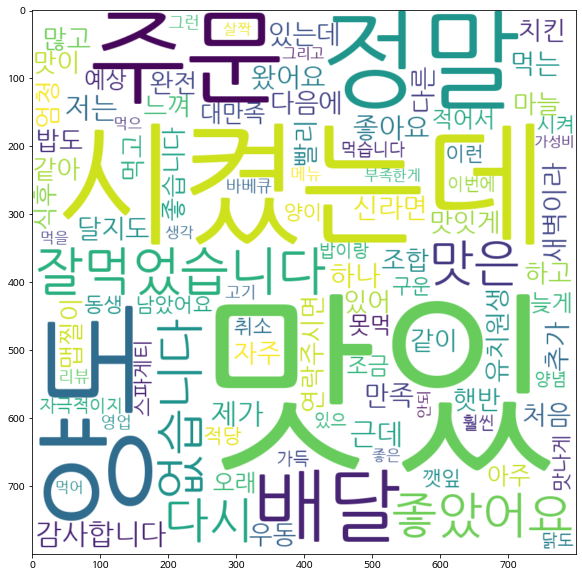

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()

In [ ]:
fig.savefig('./컬투치킨.png')

평점이 낮은 치킨집들 wordcloud하기

In [ ]:
fnames = ['BBQ-신촌점',
          '지코바치킨-독립문점',
          '숯미남숯불치킨에미친남자']

In [ ]:
texts = df_temp[df_temp['가게']=='숯미남숯불치킨에미친남자']['normalize_doc']

In [ ]:
wordrank_extractor = KRWordRank(
    min_count = 2, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

stopwords = {'항상', '맛있게', '너무', '진짜', '먹었습니다','좋아요','먹었','잘먹었습니다','역시','맛있','정말'}
passwords = {word:score for word, score in sorted(
    keywords.items(), key=lambda x:-x[1])[:300] if not (word in stopwords)}


font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'


krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)


scan vocabs ... 
num vocabs = 571
done


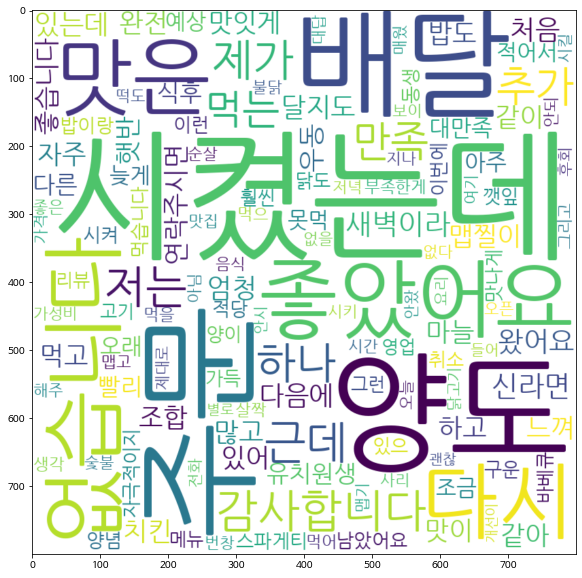

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()

In [ ]:
fig.savefig('./숯미남숯불치킨에미친남자.png')

워드클라우드의 경우 모든 단어를 볼 수가 없어서 원인파악에는 도움이 안되는 것 같다.

그냥 키워드를 추출하는게 더 도움이 될 것 같다

tf-idf를 이용하기

In [ ]:
df.head()

과일이    1
길고     1
노란     1
먹고     2
바나나    2
dtype: int64

In [ ]:
corpus = df[df['가게'] == 'BBQ-신촌점']['리뷰'].tolist()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

# corpus = [
#   '먹고 싶은 사과',
#   '먹고 싶은 바나나',
#   '길고 노란 바나나 바나나',
#   '저는 과일이 좋아요'
# ] 

vect = CountVectorizer()
document_term_matrix = vect.fit_transform(corpus)       # 문서-단어 행렬 

tf = pd.DataFrame(document_term_matrix.toarray(), columns=vect.get_feature_names())  
                                             # TF (Term Frequency)
D = len(tf)
df1 = tf.astype(bool).sum(axis=0)
idf = np.log((D+1) / (df1+1)) + 1             # IDF (Inverse Document Frequency)

# TF-IDF (Term Frequency-Inverse Document Frequency)
tfidf = tf * idf                      
tfidf = tfidf / np.linalg.norm(tfidf, axis=1, keepdims=True)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


keybert를 kiwi를 이용해서 키워드 추출하기

In [ ]:
!pip install keybert
!pip install kiwipiepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 102.5 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23800 sha256=f6c24a0db53ed96440f5887d9cafd1fca9d3966ef6d957154d03ec9da7e4fbea
  Stored in directory: /roo

In [ ]:
from keybert import KeyBERT
from kiwipiepy import Kiwi
from transformers import BertModel

In [ ]:
df.head()

,가게,맛,양,날짜,주문,사용자id,리뷰,normalize_doc,총점,등급
0,후라이드참잘하는집-서강대점,5,5,2023-02-19,핫간장치킨（무＋소스＋콜라）,st,주문해놓고 샤워하고 나왔는데 바로 왔음 배달은 항상 빨라서 좋고 맛은 말할거 없이 ...,주문해놓고 샤워하고 나왔는데 바로 왔음 배달은 항상 빨라서 좋고 맛은 말할거 없이 ...,10,1
1,후라이드참잘하는집-서강대점,5,5,2023-02-18,순살 후라이드,yh,맛있어요 너무 맛ㅇㅅ어옿,맛있어요 너무 맛 어옿,10,1
2,후라이드참잘하는집-서강대점,5,5,2023-02-17,반마리（순살）,id,너무 맛있게 잘 먹렀어요. 머스터드 소스 넉넉히 주셔수 모자라지 않게 잘 먹었습니다.,너무 맛있게 잘 먹렀어요 머스터드 소스 넉넉히 주셔수 모자라지 않게 잘 먹었습니다,10,1
3,후라이드참잘하는집-서강대점,5,5,2023-02-16,반마리（순살）,rl,굳굳굳 잘 먹었습니당,굳굳굳 잘 먹었습니당,10,1
4,후라이드참잘하는집-서강대점,5,5,2023-02-16,핫토스치킨（뼈）（무＋소스＋콜라）,st,시즈닝 팍팍~넘 맛있었요 간만에 치킨 먹은건데 기분좋게 먹었어요,시즈닝 팍팍 넘 맛있었요 간만에 치킨 먹은건데 기분좋게 먹었어요,10,1


In [ ]:
text = df[df['가게'] == 'BBQ-신촌점']['normalize_doc'].tolist()

In [ ]:
model = BertModel.from_pretrained('skt/kobert-base-v1')
kw_model = KeyBERT(model)
keywords = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words=None, top_n=10)
keywords

[[('잘먹었습니다', 0.9706), ('맛있게', 0.9658)],
 [('맛은', 0.6111),
  ('지점보다', 0.4884),
  ('실망했습니다', 0.484),
  ('맛있는데', 0.4484),
  ('적은', 0.4438),
  ('역시', 0.432),
  ('같네요', 0.4216),
  ('다른', 0.4067),
  ('확실히', 0.4051),
  ('양이', 0.3704)],
 [('냠냠', 0.7027)],
 [('먹었습니다', 0.8572)],
 [('아쉬웠어요ㅜ', 0.9699), ('바삭해서', 0.9298), ('황올인데', 0.9186)],
 [('치킨은', 0.862), ('같습니다', 0.8606), ('bbq인거', 0.8481)],
 [('왔어요', 0.8988), ('많고', 0.8923), ('빨리', 0.8085), ('배달도', 0.763)],
 [('맛있어요', 0.7625),
  ('멋있어요', 0.5447),
  ('맛이', 0.5358),
  ('좋아요', 0.5272),
  ('직원분', 0.4466),
  ('생겼어요', 0.4399),
  ('치절하고', 0.4018),
  ('너무', 0.351)],
 [('블랙페퍼', 0.4641),
  ('맛있었요', 0.4425),
  ('했어요', 0.3925),
  ('시켰는데', 0.3512),
  ('새우스틱', 0.3063),
  ('오리지널로', 0.2868),
  ('그래도', 0.2657),
  ('진짜', 0.261)],
 [('맛있게', 0.9632), ('먹었습니다', 0.891)],
 [('마스크도', 0.4681),
  ('최악이네요', 0.4545),
  ('실수', 0.429),
  ('없네요', 0.3381),
  ('안하고', 0.3294),
  ('못하는', 0.3253),
  ('포장', 0.3192),
  ('제품이', 0.3086),
  ('나가는지', 0.3044),
  ('먹으라는', 0.2984)],
 [('맛

In [ ]:
kiwi = Kiwi()
kiwi.analyze(text[4])


[([Token(form='황', tag='NNP', start=0, len=1),
   Token(form='올', tag='NNG', start=1, len=1),
   Token(form='이', tag='VCP', start=2, len=1),
   Token(form='ᆫ데', tag='EC', start=2, len=2),
   Token(form='덜', tag='MAG', start=5, len=1),
   Token(form='바삭', tag='MAG', start=7, len=2),
   Token(form='하', tag='XSA', start=9, len=1),
   Token(form='어서', tag='EC', start=9, len=2),
   Token(form='아쉽', tag='VA-I', start=12, len=3),
   Token(form='었', tag='EP', start=14, len=1),
   Token(form='어요', tag='EF', start=15, len=2),
   Token(form='ㅜ', tag='SW', start=17, len=1)],
  -88.96859741210938)]

In [ ]:
# 명사 추출 함수
def noun_extractor(text):
    results = []
    result = kiwi.analyze(text)
    for token, pos, _, _ in result[0][0]:
        if len(token) != 1 and pos.startswith('N') or pos.startswith('SL'):
            results.append(token)
    return results

In [ ]:
nouns = noun_extractor(text[4])
nouns

[]

In [ ]:
text[4]

'황올인데 덜 바삭해서 아쉬웠어요ㅜ'

konlp

In [ ]:

!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:7 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:9 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:14 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package list

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64


env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64


In [ ]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

TypeError: ignored

In [ ]:
text[5]

'치킨은 bbq인거 같습니다~'

In [ ]:
text = df

In [ ]:
len(text)

83

In [ ]:
text[18]

nan

In [ ]:
res = []

for i in range(83):
  try:
    res.append(hannanum.nouns(text[i]))
  except:
    print(f'{i}번째는 안됨')


res



18번째는 안됨
27번째는 안됨
82번째는 안됨


[['잘먹었습니'],
 ['맛', '양', '지점', '적', '것', '실망'],
 ['냠냠'],
 [],
 ['황올', '바삭해서'],
 ['치킨', '인거'],
 ['양', '배달'],
 ['직원분', '치절하', '맛', '굿'],
 ['블랙페퍼', '오리지널', '새우스틱', '진짜', '맛있었요'],
 [],
 ['주문',
  '포장',
  '제품',
  '배달',
  '제품',
  '것',
  '본인',
  '실수',
  '맞닥들였는데',
  '사과',
  '안',
  '말',
  '매장',
  '내',
  '조리',
  '사람',
  '마스크',
  '안쓰',
  '최악'],
 [],
 ['배달', '분', '동생'],
 ['먹었습니당'],
 ['핫크리스피',
  '자주시켜먹는데',
  '평소',
  '튀김옷',
  '하나',
  '안뭍어있고',
  '문의햇더',
  '평소',
  '다를거없다하는데',
  '그런거죠뭐',
  '평소',
  '자주먹',
  '소비자',
  '문제',
  '느꼇는데',
  '그정도',
  '캐치못할사람',
  '음식'],
 ['시간', '준비'],
 [],
 ['넘넘', '굿굿'],
 [],
 ['동아리', '부원들', '만족'],
 ['치킨두마리주문',
  '픽업',
  '가능한게없음',
  '조각씩',
  '서로바꿔넣어달라니',
  '포장해서안된다함',
  '분전도착',
  '그러려니했음',
  '수',
  '콜라',
  '캔콜라',
  '개',
  '바꿔달라니',
  '안된다고함',
  '다안됨',
  '다른곳에주문하'],
 [],
 ['잘먹었습니다', '후라이드', '실패'],
 ['땡기', '맛', '뻑뻑함', '곁'],
 ['후라이드', '말', '필요'],
 ['황올',
  '조각',
  '보',
  '달',
  '조각',
  '배달',
  '전화',
  '지점',
  '조각',
  '황올',
  '조각',
  '것',
  '다음부턴',
  '요청사항보',
  '전화',
  '어떨까'],
 [],
 ['

In [ ]:
hannanum.morphs(text[5])

['치킨', '은', '인거', '같', '습니다']

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (17.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128786 files and dir

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/

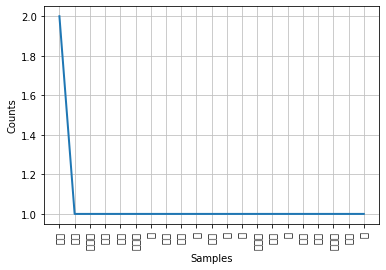

In [ ]:
from nltk import Text

kolaw = Text(okt.nouns(text[10]), name="kolaw")
kolaw.plot(30)
plt.show()